In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import ast
import re
import circlify
import geopandas as gpd
import folium
import json
import geopandas as gpd
from unidecode import unidecode
import math
from math import pi
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler, StandardScaler
from itertools import combinations
from collections import Counter

In [2]:
df = pd.read_csv('datos_jobs_finales.csv')
#df_herramientas = pd.read_csv('data_herramientas.csv')
df_comunidades = pd.read_csv("C:\\Users\\regue\\Desktop\\Data Science Projects\\PROJECTS\\IT_Job_Spain_Project\\Datos\\Procesados\\comunidades_esp.csv")

In [75]:
lista_herramientas = df_herramientas["herramienta"].to_list()

In [79]:
df.columns

Index(['titulo', 'empresa', 'fecha', 'herramientas', 'descripcion',
       'presencialidad', 'jornada', 'experiencia', 'tipo_contrato',
       'beneficios', 'solicitudes', 'portal', 'salario_min', 'salario_max',
       'localidad', 'provincia', 'comunidad', 'pais', 'latitud', 'longitud',
       'categoria_empleo'],
      dtype='object')

In [3]:
df_herramientas = df[["categoria_empleo", "herramientas"]].copy()

In [4]:
df_herramientas['herramientas'] = df_herramientas['herramientas'].apply(lambda x : str(x))
df_herramientas['herramientas'] = df_herramientas['herramientas'].replace('set()', None)
df_herramientas = df_herramientas.dropna(subset = 'herramientas').reset_index(drop = True)
df_herramientas['herramientas'] = df_herramientas['herramientas'].apply(lambda x: re.sub(r"[{}']", '', str(x)).split(', '))

# Crear un objeto MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Aplicar el MultiLabelBinarizer a la columna 'herramientas'
encoded_data = mlb.fit_transform(df_herramientas['herramientas'])
columnas_herramientas = mlb.classes_

# Crear un DataFrame con las columnas one-hot
df_encoded = pd.DataFrame(encoded_data, columns=columnas_herramientas)

# Concatenar el nuevo DataFrame con el original eliminando la columna original
df_herramientas = pd.concat([df_herramientas, df_encoded], axis=1).drop(['herramientas'], axis=1)

In [46]:
df_herramientas[df_herramientas["categoria_empleo"] == "ciberseguridad"]["pyspark"].sum()

0

In [5]:
df_herramientas = df_herramientas.groupby(by="categoria_empleo").sum().T.reset_index().rename(columns= {"index": "herramienta"}).rename_axis(None, axis=1)

In [14]:
df_herramientas[df_herramientas["herramienta"] == "pyspark"]["ciberseguridad"]

129    0
Name: ciberseguridad, dtype: int32

In [ ]:
df_herramientas.loc[67]

In [7]:
df_herramientas = df_herramientas.drop(67).reset_index(drop=True)

In [8]:
df_herramientas = df_herramientas.drop(["otros"], axis= 1)

In [9]:
df_nuevo = df_herramientas.copy()

In [14]:
df_nuevo

herramienta  administracion  ciberseguridad  data driven  \
0     Big Query               0               0           63   
1          abap               2               0           13   
2         adobe               8               0           11   
3        aleman              10               4           18   
4    amazon grc               3               1            8   
..          ...             ...             ...          ...   
185    weblogic               1               0           14   
186         xml               7               0           26   
187        yaml               1               0            8   
188      zabbix               1               0           12   
189         zos               0               0            1   

     machine learning engineer  programador  sistemas  
0                            5            8         7  
1                            0           86         1  
2                            0           67        11  
3                            0           61        29  
4                            0            3         2  
..                         ...          ...       ...  
185                          0           27        19  
186                          4          194        14  
187                          0            7         4  
188                          0            0        39  
189                          0            5         6  

[189 rows x 7 columns]

In [311]:
X = pd.DataFrame(scaler.fit_transform(df_herramientas[["ciberseguridad"]]), columns= ["ciberseguridad"])

<Axes: xlabel='ciberseguridad', ylabel='Count'>

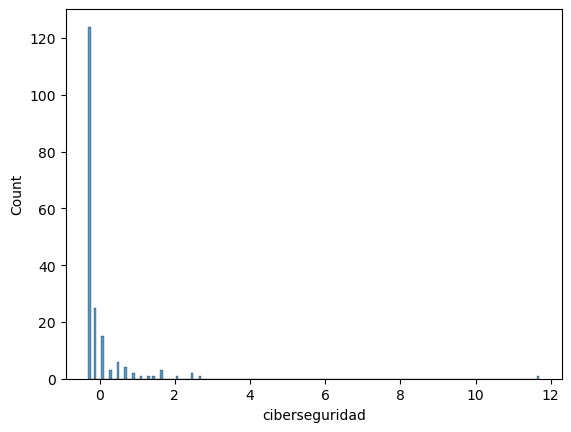

In [315]:
sns.histplot(X["ciberseguridad"])

In [283]:
df_herramientas.columns[1:]

Index(['administracion', 'ciberseguridad', 'data driven',
       'machine learning engineer', 'otros', 'programador', 'sistemas'],
      dtype='object')

In [281]:
def normalizacion(df):
    
    for col in df.columns[1:]:
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
        
    return df

In [288]:
def normalizacion_2(df):
    for col in df.columns[1:]:
        col_min = df[col].min()
        col_max = df[col].max()
        df[col] = (df[col] - col_min) / (col_max - col_min)

    # Ajuste proporcional para que la suma total sea 1
    total_sum = df.iloc[:, 1:].sum().sum()  # Suma total de los valores normalizados
    df.iloc[:, 1:] = df.iloc[:, 1:] / total_sum

    return df

In [289]:
df_herramientas_2 = normalizacion_2(df_herramientas)

0.2511856210134464

In [ ]:
min_size_herr = 0
max_size_herr = df_titulos['count'].max()
df_titulos['normalized_size'] = np.interp(df_titulos['count'], (min_size_cat, max_size_cat), (10, 100))

In [10]:
df_nuevo = df_herramientas.drop(["herramienta"], axis= 1)

In [11]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(df_nuevo), columns= df_nuevo.columns)

In [13]:
X["ciberseguridad"].idxmax()

130

In [15]:
X["herramienta"] = df_herramientas["herramienta"]

In [228]:
columnas = df_herramientas.columns[1:]

In [234]:
normalizacion(columnas,df_herramientas)

herramienta  administracion  ciberseguridad  data driven  \
0     Big Query        0.000000        0.000000     0.051852   
1          abap        0.003373        0.000000     0.010700   
2         adobe        0.013491        0.000000     0.009053   
3        aleman        0.016863        0.065574     0.014815   
4    amazon grc        0.005059        0.016393     0.006584   
..          ...             ...             ...          ...   
185    weblogic        0.001686        0.000000     0.011523   
186         xml        0.011804        0.000000     0.021399   
187        yaml        0.001686        0.000000     0.006584   
188      zabbix        0.001686        0.000000     0.009877   
189         zos        0.000000        0.000000     0.000823   

     machine learning engineer  programador  sistemas  
0                     0.067568     0.003264  0.007568  
1                     0.000000     0.035088  0.001081  
2                     0.000000     0.027336  0.011892  
3                     0.000000     0.024888  0.031351  
4                     0.000000     0.001224  0.002162  
..                         ...          ...       ...  
185                   0.000000     0.011016  0.020541  
186                   0.054054     0.079151  0.015135  
187                   0.000000     0.002856  0.004324  
188                   0.000000     0.000000  0.042162  
189                   0.000000     0.002040  0.006486  

[190 rows x 7 columns]

In [24]:
df_spider = pd.read_csv("df_spider.csv")

In [31]:
df_spider[df_spider["ciberseguridad"] >= 0.1]

administracion  ciberseguridad  data driven  machine learning engineer  \
5          0.123103        0.163934     0.438683                   0.324324   
14         0.141653        0.229508     0.405761                   0.202703   
19         0.067454        0.196721     0.289712                   0.162162   
21         0.131535        0.131148     0.080658                   0.135135   
54         0.215852        0.163934     0.225514                   0.445946   
66         0.123103        0.147541     0.280658                   0.743243   
67         1.000000        1.000000     1.000000                   0.405405   
98         0.313659        0.163934     0.388477                   0.256757   
116        0.296796        0.114754     0.369547                   0.256757   
131        0.131535        0.245902     0.777778                   0.918919   
160        0.011804        0.229508     0.020576                   0.000000   

     programador  sistemas    herramienta  
5       0.294166  0.281081      amazon ws  
14      0.230518  0.314595          azure  
19      0.084047  0.065946       big data  
21      0.539372  0.157838            c++  
54      0.639331  0.124324      framework  
66      0.164423  0.124324             ia  
67      1.000000  1.000000         ingles  
98      0.290902  0.465946  microsoft 365  
116     0.263974  0.382703         office  
131     0.377805  0.288649         python  
160     0.005712  0.011892         splunk

In [35]:
X[X["herramienta"] == "pyspark"]

administracion  ciberseguridad  data driven  machine learning engineer  \
130        0.419355             1.0          1.0                   0.918919   

     programador  sistemas herramienta  
130     0.481039   0.61949     pyspark

In [34]:
X[X["ciberseguridad"] >= 0.1]

administracion  ciberseguridad  data driven  machine learning engineer  \
3          0.053763        0.266667     0.019048                   0.000000   
5          0.392473        0.666667     0.564021                   0.324324   
6          0.204301        0.133333     0.037037                   0.013514   
14         0.451613        0.933333     0.521693                   0.202703   
16         0.467742        0.266667     0.444444                   0.040541   
19         0.215054        0.800000     0.372487                   0.162162   
21         0.419355        0.533333     0.103704                   0.135135   
39         0.021505        0.333333     0.025397                   0.013514   
41         0.188172        0.133333     0.287831                   0.256757   
48         0.397849        0.266667     0.261376                   0.067568   
52         0.005376        0.200000     0.002116                   0.000000   
54         0.688172        0.666667     0.289947                   0.445946   
56         0.483871        0.133333     0.393651                   0.189189   
57         0.129032        0.200000     0.263492                   0.148649   
65         0.010753        0.133333     0.001058                   0.000000   
66         0.392473        0.600000     0.360847                   0.743243   
68         0.172043        0.400000     0.056085                   0.000000   
70         0.811828        0.333333     0.278307                   0.189189   
88         0.000000        0.133333     0.007407                   0.000000   
92         0.193548        0.266667     0.394709                   1.000000   
97         1.000000        0.666667     0.499471                   0.256757   
98         0.075269        0.333333     0.045503                   0.040541   
105        0.102151        0.133333     0.126984                   0.000000   
109        0.086022        0.400000     0.134392                   0.189189   
114        0.026882        0.133333     0.006349                   0.000000   
115        0.946237        0.466667     0.475132                   0.256757   
120        0.091398        0.133333     0.038095                   0.000000   
125        0.139785        0.266667     0.068783                   0.000000   
130        0.419355        1.000000     1.000000                   0.918919   
131        0.010753        0.133333     0.050794                   0.405405   
135        0.182796        0.200000     0.030688                   0.040541   
140        0.032258        0.133333     0.023280                   0.027027   
147        0.763441        0.133333     0.120635                   0.081081   
151        0.048387        0.133333     0.067725                   0.000000   
156        0.365591        0.333333     0.170370                   0.162162   
157        0.048387        0.133333     0.016931                   0.000000   
159        0.037634        0.933333     0.026455                   0.000000   
161        0.618280        0.266667     0.887831                   0.216216   
167        0.010753        0.133333     0.061376                   0.445946   
171        0.000000        0.133333     0.017989                   0.000000   

     programador  sistemas        herramienta  
3       0.031688  0.067285             aleman  
5       0.374545  0.603248          amazon ws  
6       0.538182  0.048724            angular  
14      0.293506  0.675174              azure  
16      0.571948  0.494200      base de datos  
19      0.107013  0.141531           big data  
21      0.686753  0.338747                c++  
39      0.005195  0.445476  directorio activo  
41      0.370390  0.278422             docker  
48      0.038442  0.220418              excel  
52      0.004675  0.220418           fortinet  
54      0.814026  0.266821          framework  
56      0.790130  0.262181                git  
57      0.106494  0.248260       google cloud  
65      0.000000  0.025522            hyper v

In [193]:
prueba = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})

In [262]:
df_herramientas["herramienta"]

0       Big Query
1            abap
2           adobe
3          aleman
4      amazon grc
          ...    
185      weblogic
186           xml
187          yaml
188        zabbix
189           zos
Name: herramienta, Length: 190, dtype: object

In [368]:
df_herramientas[df_herramientas["ciberseguridad"] == 1]

administracion  ciberseguridad  data driven  machine learning engineer  \
130        0.419355             1.0          1.0                   0.918919   

     programador  sistemas herramienta  
130     0.481039   0.61949     pyspark

In [19]:
df_herramientas.columns

Index(['administracion', 'ciberseguridad', 'data driven',
       'machine learning engineer', 'programador', 'sistemas', 'herramienta'],
      dtype='object')

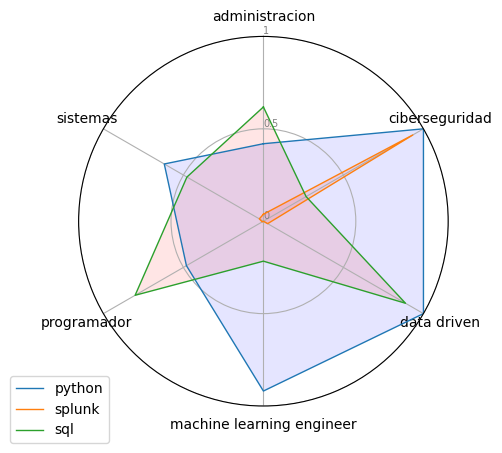

In [17]:
# ------- PART 1: Create background
eleccion = ["python", "splunk", "sql"]

# number of variable
categories= df_herramientas.columns[:-1]

N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,0.5,1], ["0","0.5","1"], color="grey", size=7)
plt.ylim(0,1)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df_herramientas[df_herramientas["herramienta"] == eleccion[0]].drop(['herramienta'], axis= 1).values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=eleccion[0])
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df_herramientas[df_herramientas["herramienta"] == eleccion[1]].drop(['herramienta'], axis= 1).values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=eleccion[1])
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=df_herramientas[df_herramientas["herramienta"] == eleccion[2]].drop(['herramienta'], axis= 1).values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=eleccion[2])
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

[78, 15, 945, 68, 926, 267]

In [196]:
prueba

group  var1  var2  var3  var4  var5
0     A  38.0    29     8     7    28
1     B   1.5    10    39    31    15
2     C  30.0     9    23    33    32
3     D   4.0    34    24    14    14

In [206]:
values=prueba.loc[0].drop('group').values.flatten().tolist()


In [254]:
values

[115, 4, 839, 16, 1543, 206, 115]

In [47]:
df_beneficios = (df["beneficios"].value_counts(normalize=True)*100).reset_index()
df_beneficios["proportion"] = df_beneficios["proportion"].apply(lambda x: round(x))

In [50]:
df_beneficios

beneficios  proportion
0       False          77
1        True          23

In [51]:
df["salario_min"].dropna()

28       40800.0
96       42000.0
162      30000.0
181      55500.0
216      35000.0
          ...   
18145    42000.0
18153    30000.0
18165    36000.0
18166    30000.0
18167    42000.0
Name: salario_min, Length: 3076, dtype: float64

In [32]:
df_beneficios.loc[0, "beneficios"] = "Sin Beneficios"

C:\Users\regue\AppData\Local\Temp\ipykernel_6332\2893528934.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Con Beneficios' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_beneficios.loc[1, "beneficios"] = "Con Beneficios"


<Axes: xlabel='salario_medio', ylabel='experiencia'>

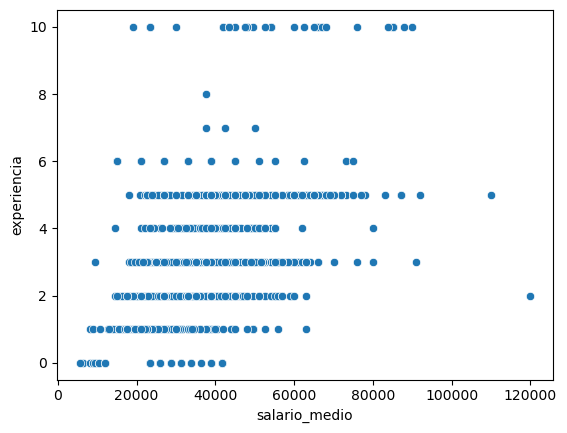

In [16]:
sns.scatterplot(x= df["salario_medio"], y=df["experiencia"])

In [13]:
df.groupby(by="experiencia")["salario_medio"].mean()

experiencia
0.0     27646.382979
1.0     23807.265203
2.0     32271.130031
3.0     39151.673841
4.0     39723.770492
5.0     46948.584906
6.0     35816.666667
7.0     43333.333333
8.0     37500.000000
9.0              NaN
10.0    56392.580645
Name: salario_medio, dtype: float64

In [12]:
df["salario_medio"] = (df["salario_min"] + df["salario_max"])/2

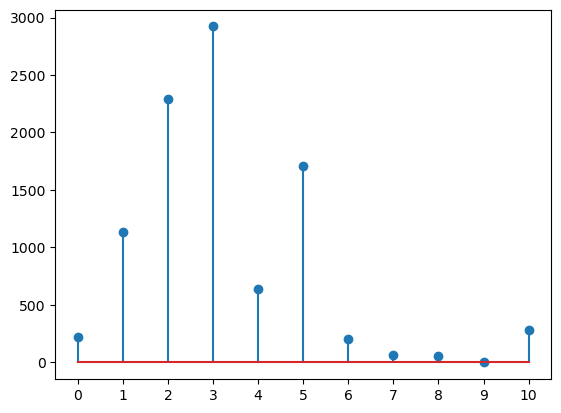

In [38]:
df_experiencia = df["experiencia"].value_counts().sort_index().to_frame().reset_index()
plt.stem(df_experiencia["experiencia"], df_experiencia["count"])
plt.xticks(df_experiencia["experiencia"])
plt.show()

In [ ]:
# Reorder it following the values:
ordered_df = df.sort_values(by='experiencia')

# Make the plot
plt.stem(ordered_df['experiencia'])
plt.xticks(10, ordered_df.value_counts().index)

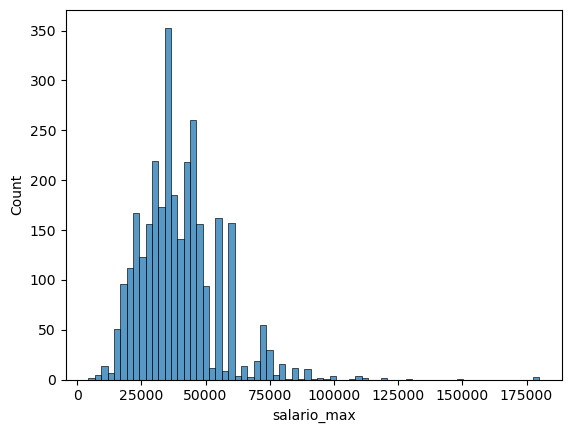

In [42]:
sns.histplot(df["salario_max"]);

In [166]:
comunidades_autonomas = {
    'Andalucía': 'Andalucia',
    'Aragón': 'Aragon',
    'Principado de Asturias': 'Principado de Asturias',
    'Illes Balears': 'Islas Baleares',
    'Canarias': 'Canarias',
    'Cantabria': 'Cantabria',
    'Castilla y León': 'Castilla y Leon',
    'Castilla-La Mancha': 'Castilla-La Mancha',
    'Cataluña': 'Cataluna',
    'Comunitat Valenciana': 'Comunidad Valenciana',
    'Extremadura': 'Extremadura',
    'Galicia': 'Galicia',
    'Comunidad de Madrid': 'Comunidad de Madrid',
    'Región de Murcia': 'Region de Murcia',
    'Comunidad Foral de Navarra': 'Navarra',
    'País Vasco': 'Pais Vasco',
    'La Rioja': 'La Rioja',
    'Ciudad Autónoma de Ceuta': 'Ceuta',
    'Ciudad Autónoma de Melilla': "Melilla"
}

In [3]:
with open("provincias_esp_choro.geojson", 'r') as archivo:
    datos_json = json.load(archivo)

In [194]:
datos_json["features"][3]["properties"]["comunidad"]

'Cataluna'

In [195]:
#provincias_geojson.to_file("provincias_geojson.geojson", driver='GeoJSON')

In [4]:
df_comunidad_suma = df.groupby('comunidad').size().reset_index(name='tot_jobs')
df_comunidades = df_comunidades.merge(df_comunidad_suma, on='comunidad', how='left')
df_comunidades["comunidad"] = df_comunidades["comunidad"].map(lambda x: re.sub(r'[áéíóúüàèìòùñ]', lambda m: unidecode(m.group()), str(x)))

In [13]:
min_size = df_comunidades['tot_jobs'].min()
max_size = df_comunidades['tot_jobs'].max()
df_comunidades['normalized_size'] = np.interp(df_comunidades['tot_jobs'], (min_size, max_size), (10, 100))

In [15]:
mapa_españa = folium.Map(location=[40.223611, -1.979444], zoom_start=4)

folium.Choropleth(
    geo_data=datos_json,
    name= "choropleth",
    data= df_comunidades,
    columns= ["comunidad", "normalized_size"],
    key_on= "properties.comunidad",
    fill_color= "RdYlBu_r",
    bins= 20,
    saturation= 0.5,
    fill_opacity= 0.6,
    line_opacity= .1,
    legend_name="Unemployment Rate (%)",
).add_to(mapa_españa)

folium.LayerControl().add_to(mapa_españa)

mapa_españa

In [9]:
mask_pres = ((df["presencialidad"] == "no especificado") | (df["categoria_empleo"] == "otros"))
df_pres = df[~mask_pres].groupby(by="presencialidad")["categoria_empleo"].value_counts().to_frame().reset_index()
df_pres = df_pres.groupby(by="presencialidad")[["presencialidad", "categoria_empleo", "count"]].head(3)

In [11]:
result = []
for tipo, tipo_group in df.groupby('Tipo'):
    tipo_dict = {'id': tipo, 'datum': tipo_group['Cantidad'].sum(), 'children': []}
    for categoria, categoria_row in tipo_group.groupby('Categoria'):
        categoria_dict = {'id': categoria, 'datum': categoria_row['Cantidad'].sum()}
        tipo_dict['children'].append(categoria_dict)
    result.append(tipo_dict)

# El resultado final es similar a tu estructura deseada
data_result = [{'id': 'World', 'datum': df['Cantidad'].sum(), 'children': result}]

0      905
1      299
2      151
6      262
7       98
8       60
11    1421
12     526
13     283
Name: count, dtype: int64

In [14]:
df_pres['count'].to_list()

[905, 299, 151, 262, 98, 60, 1421, 526, 283]

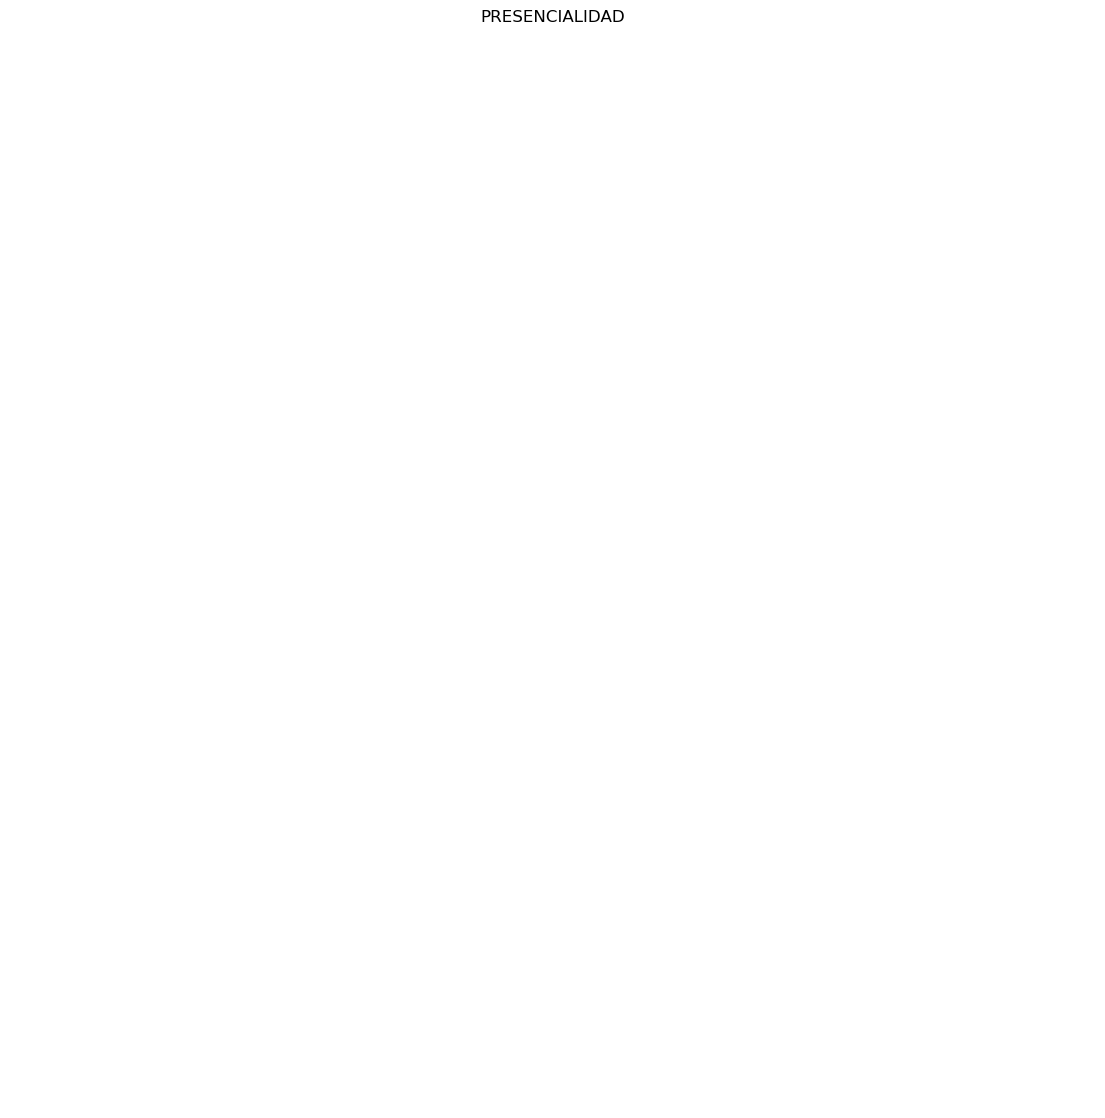

In [13]:
circles = circlify.circlify(
        df_pres['count'].to_list(),
        show_enclosure=False,
        target_enclosure=circlify.Circle(x=0, y=0, r=1)
    )

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(14, 14))

# Title
ax.set_title('PRESENCIALIDAD')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circles for each level
for circle in circles:
    x, y, r = circle
    level = circle.level

    if level == 2:
        # Circle for the highest level (continents)
        ax.add_patch(plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))
        # Print labels for the continents
        label = circle.ex
        plt.annotate(label, (x, y), va='center', ha='center',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))
    elif level == 3:
        # Circle and labels for the second-highest level
        ax.add_patch(plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="#69b3a2"))
        label = df_pres.loc[df_pres['count'] == circle.ex, 'categoria_empleo'].values[0]
        plt.annotate(label, (x, y), ha='center', color="white")

### Cambios en el DF para el EDA

#### Función para limpiar las herramientas

In [4]:
def safe_literal_eval(s):
    try:
        return ast.literal_eval(s)
    except (ValueError, SyntaxError):

        return set()

#### Función para contar las herramientas

In [5]:
def contar_herramientas(df):
    # Aplanamos la lista de sets en una sola lista de herramientas
    herramientas_lista = [herramienta for sublist in df['herramientas'].tolist() for herramienta in sublist]
    # Contamos la ocurrencia de cada herramienta
    return pd.Series(herramientas_lista).value_counts()

#### Ejecutar la limpieza

In [6]:
# Aplica la función safe_literal_eval para convertir los strings a sets
df['herramientas'] = df['herramientas'].apply(safe_literal_eval)

# Contamos las herramientas en el DataFrame original
conteo_herramientas_original = contar_herramientas(df)

# Hacemos los cambios in place, removiendo los sets vacíos que representan valores NaN
df['herramientas'] = df['herramientas'].apply(lambda x: x if x != {'set()'} else set())

In [7]:
df['herramientas'].head(60)

0                                  {sql, base de datos}
1     {ingles, amazon ws, docker, java, javascript, ...
2                                              {ingles}
3                                         {ingles, c++}
4                           {sql, mongo, base de datos}
5     {terraform, azure, amazon ws, framework, opens...
6     {terraform, azure, amazon ws, openshift, simul...
7     {ingles, apirest, javascript, nodejs, python, ...
8                                                 {c++}
9     {kotlin, ingles, apirest, python, microsoft 36...
10                                             {ingles}
11    {azure, ingles, sql, css, solid, javascript, c...
12               {microsoft 365, solid, office, ingles}
13          {microsoft 365, css, c++, sql, office, git}
14    {ingles, powerpoint, aleman, excel, microsoft ...
15                        {lean, aleman, ingles, excel}
16                                             {ingles}
17                                     {aleman, 

#### Descartar columnas innecesarias

In [8]:
df = df.drop(['descripcion', 'latitud', 'longitud'], axis=1)

### t

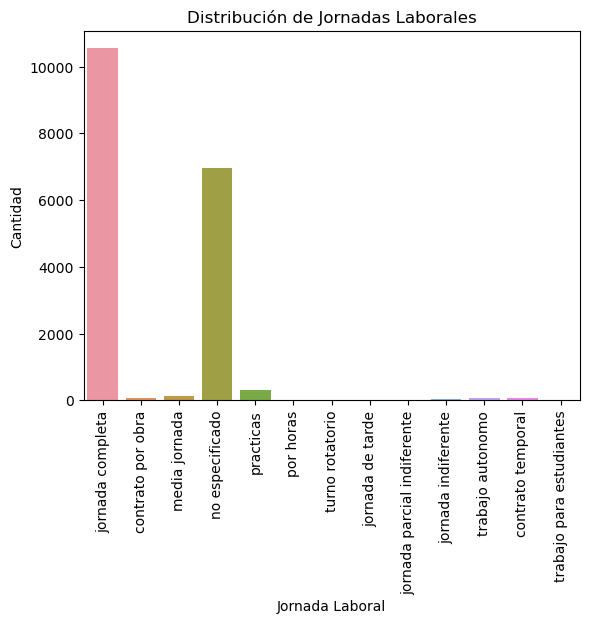

In [9]:
sns.countplot(x='jornada', data=df)
plt.title('Distribución de Jornadas Laborales')
plt.xlabel('Jornada Laboral')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()

/home/esteban/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


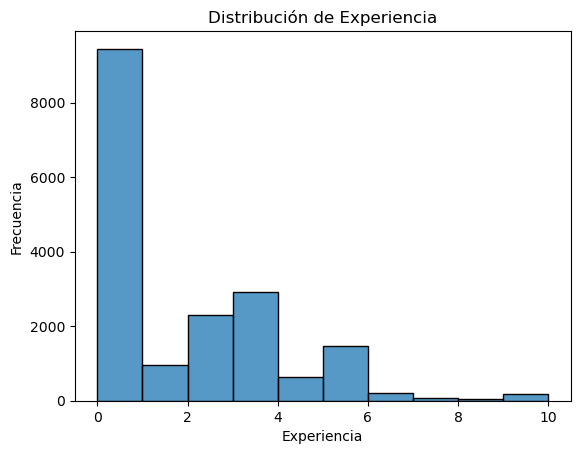

In [10]:
# Asegúrate de que 'experiencia' no tiene NaNs o inf antes de convertir a numpy array
df['experiencia'] = df['experiencia'].replace([np.inf, -np.inf], np.nan).dropna()

# Convierte la serie a un array de NumPy
experiencia_array = df['experiencia'].to_numpy()

# Grafica utilizando el array
sns.histplot(experiencia_array, bins=10)
plt.title('Distribución de Experiencia')
plt.xlabel('Experiencia')
plt.ylabel('Frecuencia')
plt.show()


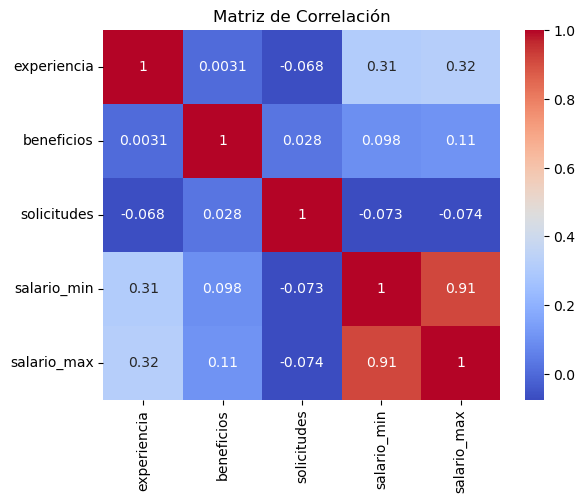

In [11]:
df_numeric = df.select_dtypes(include=['float64', 'int64', 'bool'])

correlation_matrix = df_numeric.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

/home/esteban/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/esteban/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/esteban/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/esteban/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

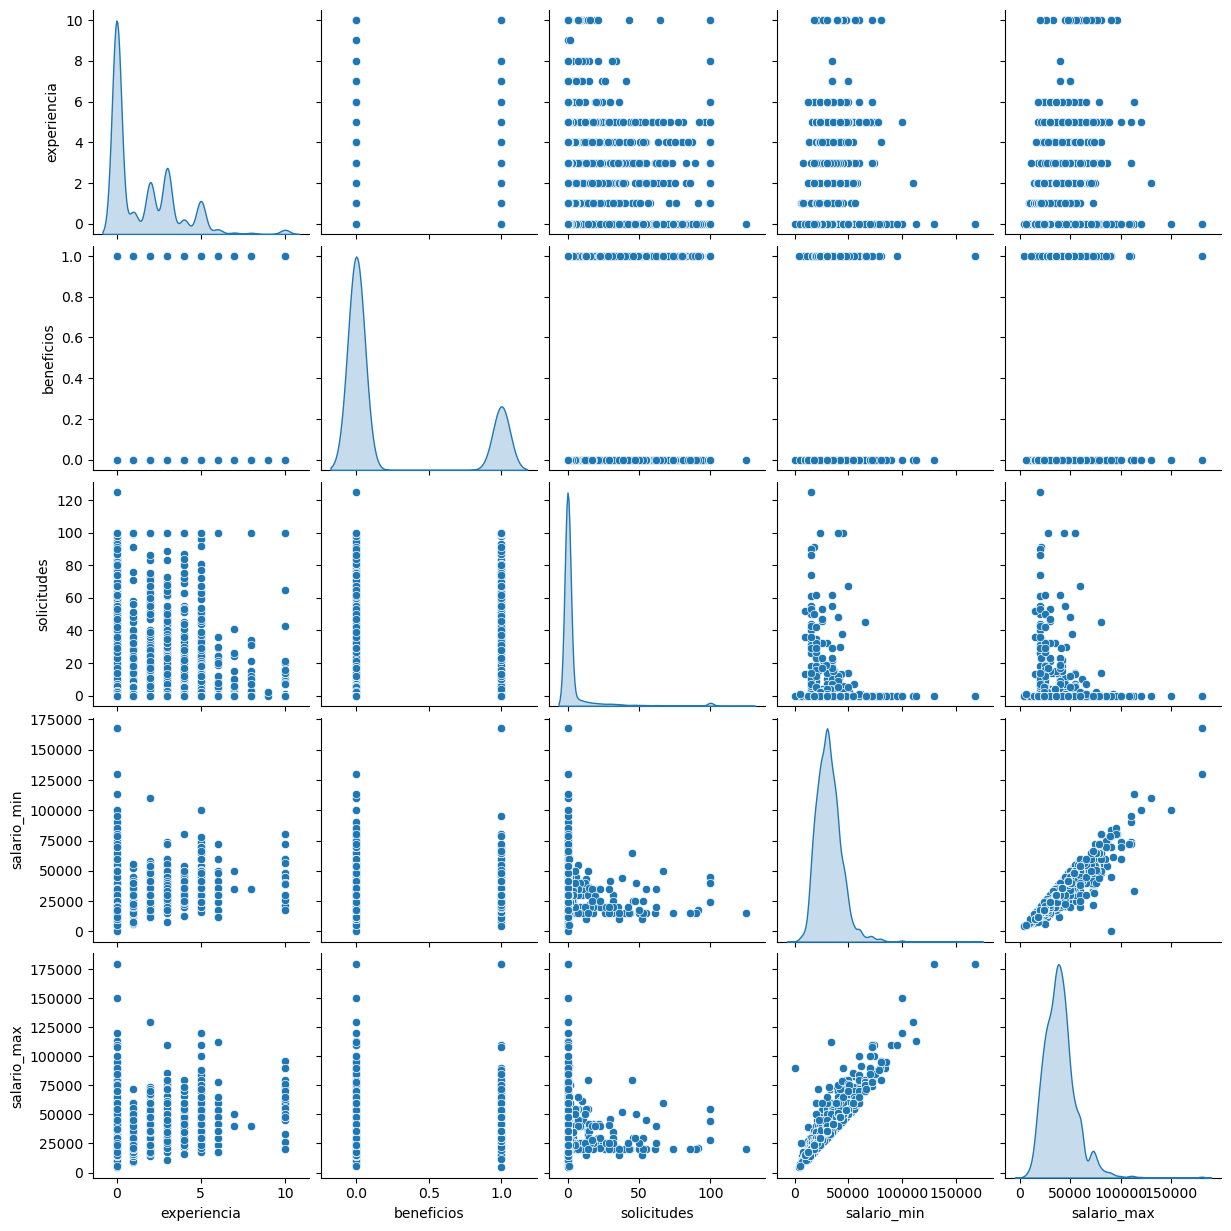

In [12]:
sns.pairplot(df, diag_kind='kde')
plt.show()

<Axes: xlabel='experiencia'>

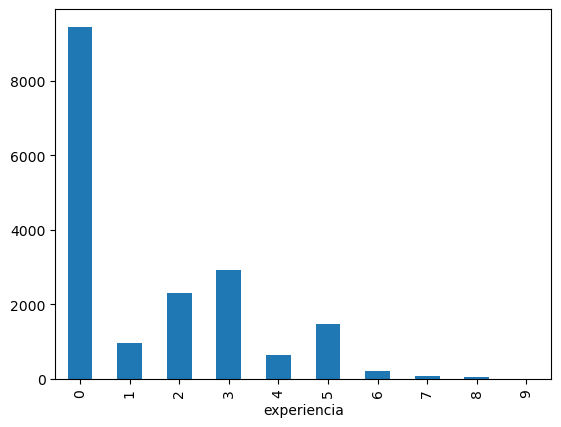

In [13]:
df['experiencia'].value_counts().sort_index().head(10).plot(kind = 'bar')

In [14]:
def graficar_columnas_dinamicas(df):
    num_cols = df.shape[1]
    num_rows = int(np.ceil(num_cols / 3))  # Ajustado para 3 columnas por fila
    fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    axs = axs.flatten()

    for i, column in enumerate(df.columns):
        ax = axs[i]
        if np.issubdtype(df[column].dtype, np.number):
            df[column].dropna().hist(ax=ax, bins=15)
        else:
            value_counts = df[column].value_counts().head(10)
            value_counts.plot(kind='bar', ax=ax)
            # Aquí se establece la rotación y la alineación horizontal
            ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
            
        ax.set_title(column)
        ax.set_ylabel('Frecuencia' if np.issubdtype(df[column].dtype, np.number) else 'Conteo')
        ax.set_xlabel('')

    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.show()

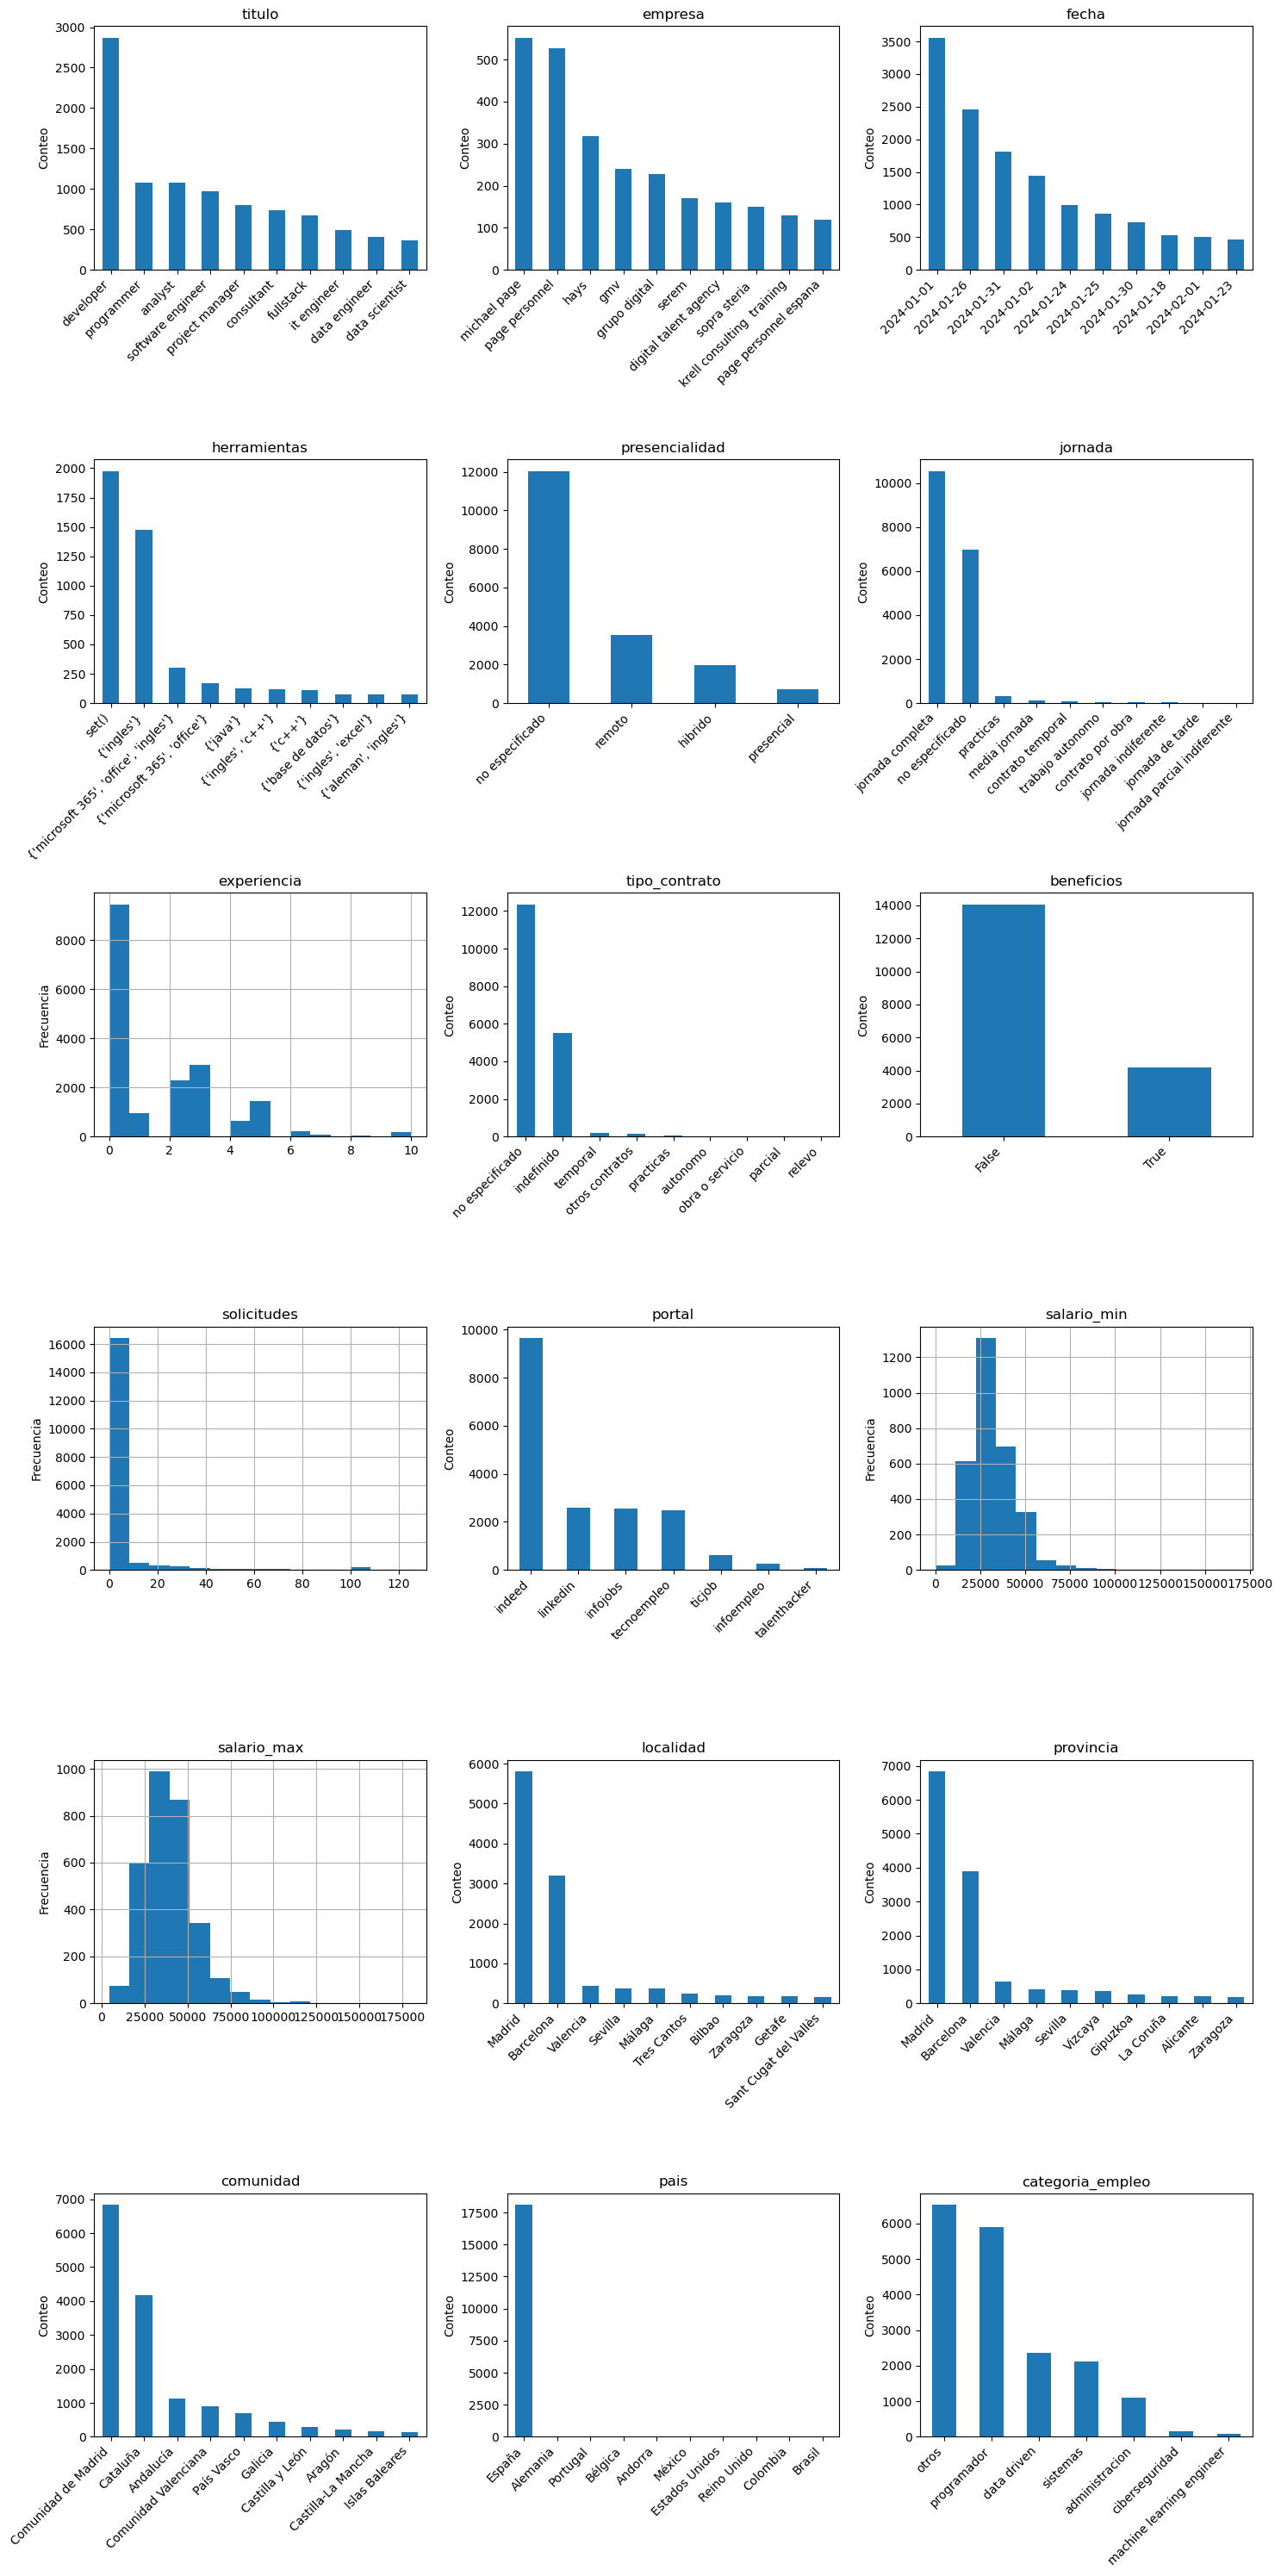

In [15]:
# Llamada a la función para graficar dinámicamente las columnas del DataFrame
graficar_columnas_dinamicas(df)

In [16]:
df_encoded = df.drop(['titulo', 'empresa', 'fecha', 'solicitudes', 'pais', 'provincia', 'localidad'], axis=1)

In [17]:
'''df_encoded = pd.get_dummies(df_encoded)

correlation_matrix = df_encoded.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()'''

"df_encoded = pd.get_dummies(df_encoded)\n\ncorrelation_matrix = df_encoded.corr()\n\nsns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')\nplt.title('Matriz de Correlación')\nplt.show()"

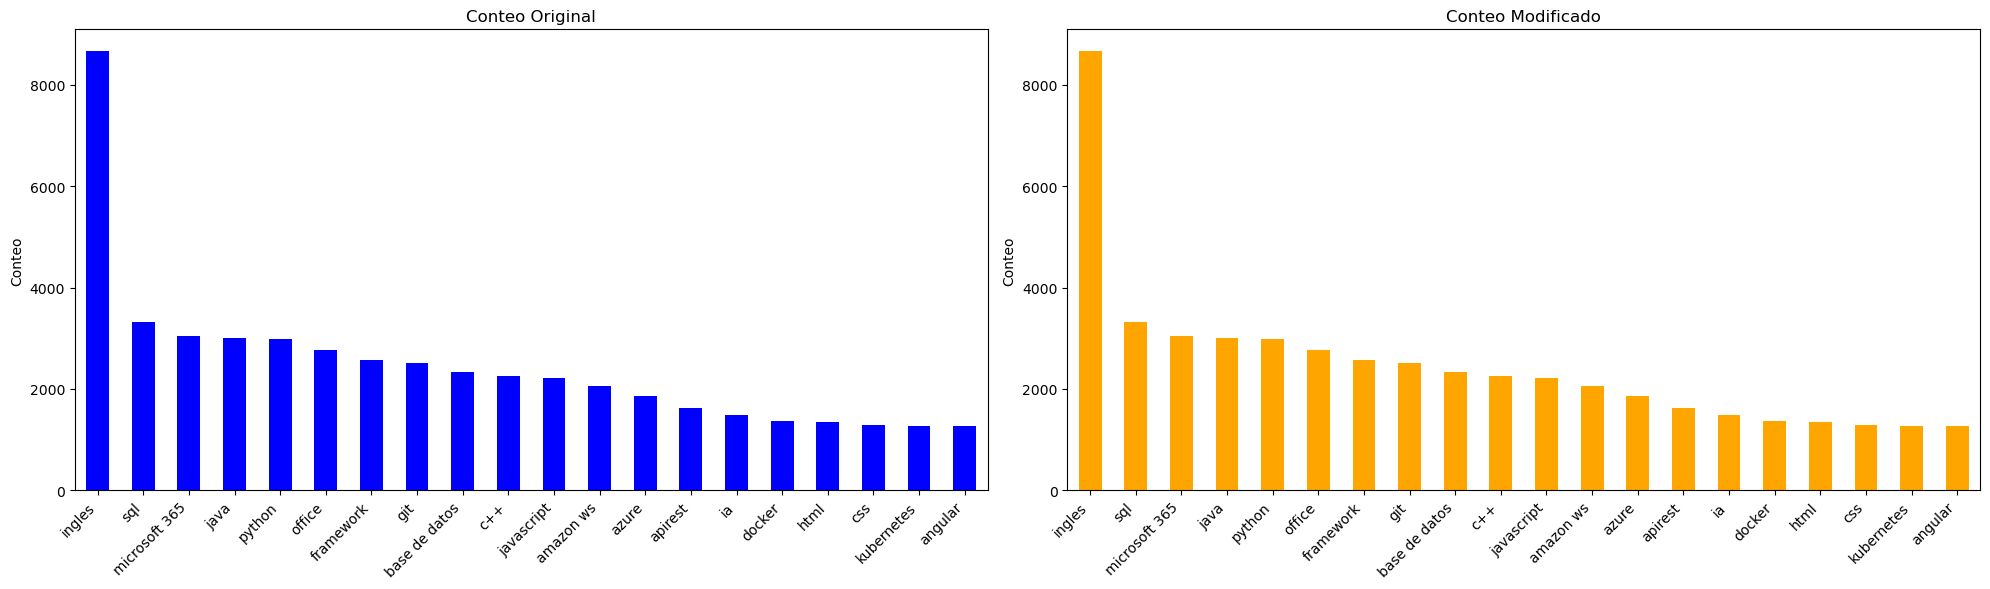

titulo  \
0                                   software engineer   
1                                           developer   
2                                         qa engineer   
3                                           developer   
4                                    systems engineer   
5                                   software engineer   
6   ingeniero/a de desarrollo de producto electronico   
7                                   software engineer   
8   ingeniero/a de desarrollo de producto electronico   
9                                   software engineer   
10                                        id engineer   
11                                          developer   
12                           development engineer m/f   
13                                          developer   
14  junior ingeniero de desarrollo refrigeracion m...   
15  manufacturing engineer / ingeniero de fabricac...   
16                                  software engineer   
17                                        id engineer   
18                                  software engineer   
19  ingeniero/a mecanico/a de fabricacion - celula...   

                              empresa       fecha  \
0   soluciones medioambientales morga  2024-01-29   
1                              smadex  2024-01-24   
2                      rdt ingenieros  2024-01-24   
3                        agap2 espana  2024-01-30   
4                               indra  2024-01-17   
5                            viewnext  2024-01-25   
6                        diggia group  2023-12-31   
7                fmit technologies sl  2024-01-10   
8                     the wise seeker  2024-01-30   
9                      bending spoons  2024-01-26   
10                            acciona  2024-01-17   
11                             cyncly  2024-01-17   
12                             zimvie  2024-01-24   
13                       bimba y lola  2024-01-17   
14                         edag group  2024-01-17   
15                     hitachi energy  2024-01-30   
16                           exceltic  2024-01-17   
17                    bertrandt group  2024-01-26   
18                               hays  2024-01-17   
19                              talgo  2024-01-30   

                                         herramientas  \
0                                {sql, base de datos}   
1   {ingles, amazon ws, docker, java, javascript, ...   
2                                            {ingles}   
3                                       {ingles, c++}   
4                         {sql, mongo, base de datos}   
5   {terraform, azure, amazon ws, framework, opens...   
6   {terraform, azure, amazon ws, openshift, simul...   
7   {ingles, apirest, javascript, nodejs, python, ...   
8                                               {c++}   
9   {kotlin, ingles, apirest, python, microsoft 36...   
10                                           {ingles}   
11  {azure, ingles, sql, css, solid, javascript, c...   
12             {microsoft 365, solid, office, ingles}   
13        {microsoft 365, css, c++, sql, office, git}   
14  {ingles, powerpoint, aleman, excel, microsoft ...   
15                      {lean, aleman, ingles, excel}   
16                                           {ingles}   
17                                   {aleman, ingles}   
18  {ingles, etl, django, java, react, bi, javascr...   
19                                           {ingles}   

                                          descripcion   presencialidad  \
0   acerca del empleoen grupo morga empresa con ma...       presencial   
1   acerca del empleo eres un ingeniero de backend...          hibrido   
2   acerca del empleo ingeniero calidad desarrollo...       presencial   
3   acerca del empleoactualmente buscamos seleccio...          hibrido   
4   acerca del empleocomo parte presencial de nues...          hibrido   
5   acerca del empleo buscas un cambio una nueva o...           remoto   
6   acerca del empl

In [19]:
# Función para evaluar de forma segura los strings que deberían ser sets
def safe_literal_eval(s):
    try:
        return ast.literal_eval(s)
    except (ValueError, SyntaxError):
        # En caso de error, devolveremos un set vacío
        return set()

# Función para contar las herramientas
def contar_herramientas(df):
    # Aplanamos la lista de sets en una sola lista de herramientas
    herramientas_lista = [herramienta for sublist in df['herramientas'].tolist() for herramienta in sublist]
    # Contamos la ocurrencia de cada herramienta
    return pd.Series(herramientas_lista).value_counts()

# Carga el DataFrame
df = pd.read_csv('datos_jobs_finales.csv')

# Aplica la función safe_literal_eval para convertir los strings a sets
df['herramientas'] = df['herramientas'].apply(safe_literal_eval)

# Contamos las herramientas en el DataFrame original
conteo_herramientas_original = contar_herramientas(df)

# Creamos una copia del DataFrame para modificarlo
df_modificado = df.copy()

# Removemos los sets vacíos que representan valores NaN
df_modificado['herramientas'] = df_modificado['herramientas'].apply(lambda x: x if x != {'set()'} else set())

# Contamos las herramientas en el DataFrame modificado
conteo_herramientas_modificado = contar_herramientas(df_modificado)

# Graficamos ambos conteos lado a lado para comparación
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Gráfico para el conteo original
conteo_herramientas_original.head(20).plot(kind='bar', ax=axs[0], color='blue', title='Conteo Original')

# Gráfico para el conteo modificado
conteo_herramientas_modificado.head(20).plot(kind='bar', ax=axs[1], color='orange', title='Conteo Modificado')

# Ajustamos las etiquetas para que sean legibles
for ax in axs:
    ax.set_ylabel('Conteo')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

df_modificado.head(20)

# Análisis herramientas

## Encoder

In [147]:
from sklearn.preprocessing import MultiLabelBinarizer
from itertools import combinations
from collections import Counter

In [148]:
df_herramientas = df.copy()

In [149]:
df_herramientas['herramientas'] = df_herramientas['herramientas'].apply(lambda x : str(x)) 

df_herramientas['herramientas'] = df_herramientas['herramientas'].replace('set()', None)

df_herramientas = df_herramientas.dropna(subset = 'herramientas').reset_index(drop = True)

df_herramientas['herramientas'] = df_herramientas['herramientas'].apply(lambda x: re.sub(r"[{}']", '', str(x)).split(', '))

# Crear un objeto MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Aplicar el MultiLabelBinarizer a la columna 'herramientas'
encoded_data = mlb.fit_transform(df_herramientas['herramientas'])
columnas_herramientas = mlb.classes_

# Crear un DataFrame con las columnas one-hot
df_encoded = pd.DataFrame(encoded_data, columns=columnas_herramientas)

# Concatenar el nuevo DataFrame con el original eliminando la columna original
df_herramientas = pd.concat([df_herramientas, df_encoded], axis=1).drop(['herramientas'], axis=1)

In [152]:
df_herramientas.drop(["titulo", "empresa", "fecha", "descripcion", "presencialidad", "jornada", "experiencia", "tipo_contrato", "beneficios", "solicitudes"])

titulo                            empresa       fecha  \
0           software engineer  soluciones medioambientales morga  2024-01-29   
1                   developer                             smadex  2024-01-24   
2                 qa engineer                     rdt ingenieros  2024-01-24   
3                   developer                       agap2 espana  2024-01-30   
4            systems engineer                              indra  2024-01-17   
...                       ...                                ...         ...   
16257           data engineer                                NaN  2024-01-31   
16258  tecnico de apificacion                                NaN  2024-01-31   
16259         cloud architect                                NaN  2024-01-31   
16260               developer                                NaN  2024-01-31   
16261               developer                                NaN  2024-02-01   

                                             descripcion presencialidad  \
0      acerca del empleoen grupo morga empresa con ma...     presencial   
1      acerca del empleo eres un ingeniero de backend...        hibrido   
2      acerca del empleo ingeniero calidad desarrollo...     presencial   
3      acerca del empleoactualmente buscamos seleccio...        hibrido   
4      acerca del empleocomo parte presencial de nues...        hibrido   
...                                                  ...            ...   
16257  desde talenthackers buscamos incorporar intern...     presencial   
16258  operador lider en el sector espanol de transpo...         remoto   
16259  it is a multinational company operating in the...         remoto   
16260  es el operador lider en el sector espanol de t...         remoto   
16261  nuestro cliente destaca por su innovacion y va...         remoto   

                jornada  experiencia    tipo_contrato  beneficios  \
0      jornada completa            0  no especificado       False   
1      jornada completa            4  no especificado       False   
2      jornada completa            0  no especificado       False   
3      jornada completa            3  no especificado        True   
4      jornada completa            0  no especificado       False   
...                 ...          ...              ...         ...   
16257  jornada completa            3       indefinido       False   
16258  jornada completa            2       indefinido       False   
16259  jornada completa            4       indefinido       False   
16260  jornada completa            3       indefinido       False   
16261  jornada completa            4       indefinido       False   

       solicitudes  ... vba  vbnet  visual studio vsphere vuejs weblogic xml  \
0               17  ...   0      0              0       0     0        0   0   
1               14  ...   0      0              0       0     0        0   0   
2                9  ...   0      0              0       0     0        0   0   
3               28  ...   0      0              0       0     0        0   0   
4                5  ...   0      0              0       0     0        0   0   
...            ...  ...  ..    ...            ...     ...   ...      ...  ..   
16257            0  ...   0      0              0       0     0        0   0   
16258            0  ...   0      0              0       0     0        0   0   
16259            0  ...   0      0              0       0     0        0   0   
16260            0  ...   0      0              0       0     0        0   0   
16261            0  ...   0      0              0       0     0        0   0   

       yaml  zabbix zos  
0         0       0   0  
1         0       0   0  
2         0       0   0  
3         0       0   0  
4         0       0   0  
...     ...     ...  ..  
16257     0       0   0  
16258     0       0   0  
16259     0       0   0  
16260     0       0   0  
16261     0       0   0  

[16262 rows x 210 columns]

In [150]:
categorias_empleo = df_herramientas['categoria_empleo'].unique()

## Análisis

### Análisis univariable

In [164]:
top_30_herramientas.to_csv("data_herramientas.csv", index= False, sep= ",")

In [ ]:
mask = top_30_herramientas["herramientas"]

In [170]:
top_30_herramientas[mask]

herramienta  count
0           ingles   8665
1              sql   3318
2    microsoft 365   3037
3             java   3005
4           python   2994
..             ...    ...
185      puppeteer     16
186    oracle rman     14
187    power shell      8
188           nltk      7
189  beautifulsoup      4

[190 rows x 2 columns]

#### Análisis por herramienta

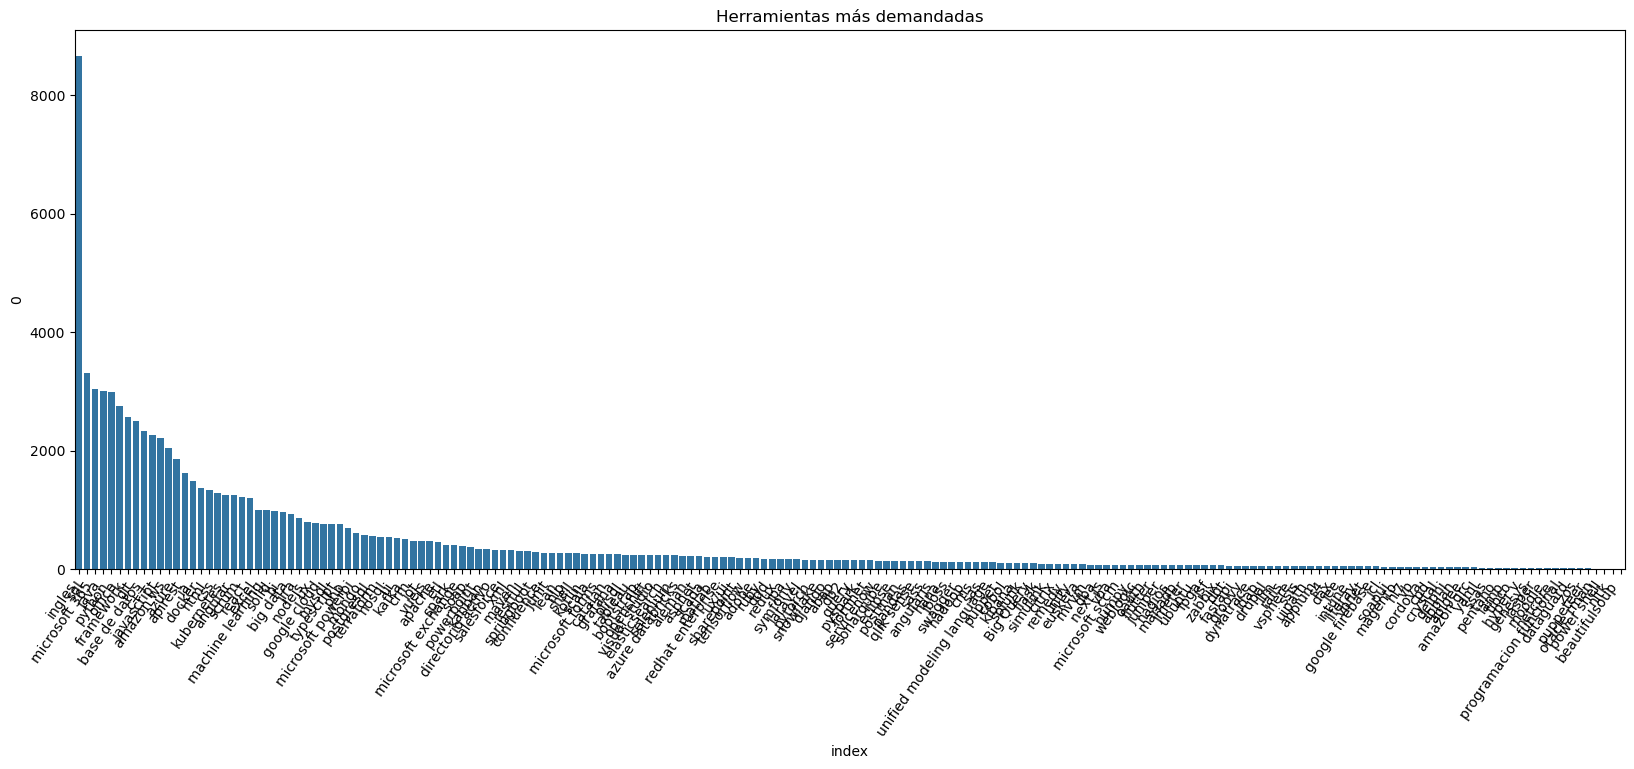

In [156]:
plt.figure(figsize = (20,7))

top_30_herramientas = df_herramientas[columnas_herramientas].sum().sort_values(ascending = False).head(30).reset_index()

sns.barplot(x = top_30_herramientas['index'], y = top_30_herramientas[0])
plt.xticks(rotation = 55, ha = 'right')
plt.title(f'Herramientas más demandadas')
plt.show()

- Eliminaremos el inglés del análisis posterior ya que es una herramienta demandada en todas las áreas con gran importancia

## Herramientas sin inglés

In [304]:
df_herramientas = df_herramientas.drop(columns = 'ingles')

columnas_herramientas = df_herramientas.columns.drop(df.columns.drop('herramientas'))

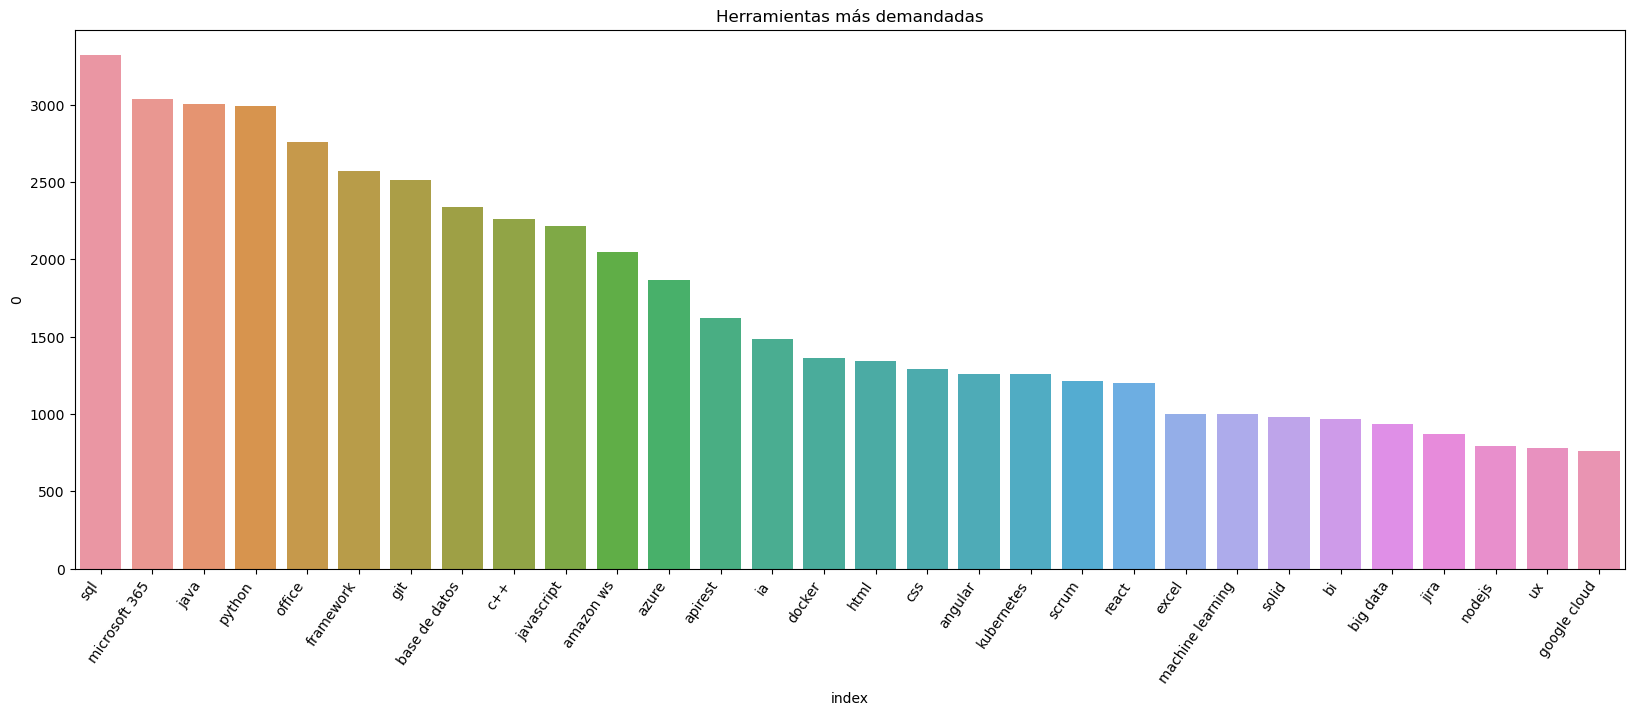

In [305]:
plt.figure(figsize = (20,7))

top_30_herramientas = df_herramientas[columnas_herramientas].sum().sort_values(ascending = False).head(30).reset_index()

sns.barplot(x = top_30_herramientas['index'], y = top_30_herramientas[0])
plt.xticks(rotation = 55, ha = 'right')
plt.title(f'Herramientas más demandadas')
plt.show()

#### Análisis por pares de  herramientas

In [306]:
matriz_correlacion = df_herramientas[columnas_herramientas].corr()

In [307]:
# Elegimos los pares con mayor correlacion
max_corr_20_pairs = matriz_correlacion.abs().unstack().sort_values(ascending=False).drop_duplicates().head(20)

In [308]:
#Nos quedamos con los elementos unicos del multiindice
herraminetas_mayor_correlacion = set([herramienta for par_herramientas in max_corr_20_pairs.index for herramienta in par_herramientas])
herraminetas_mayor_correlacion = list(herraminetas_mayor_correlacion)

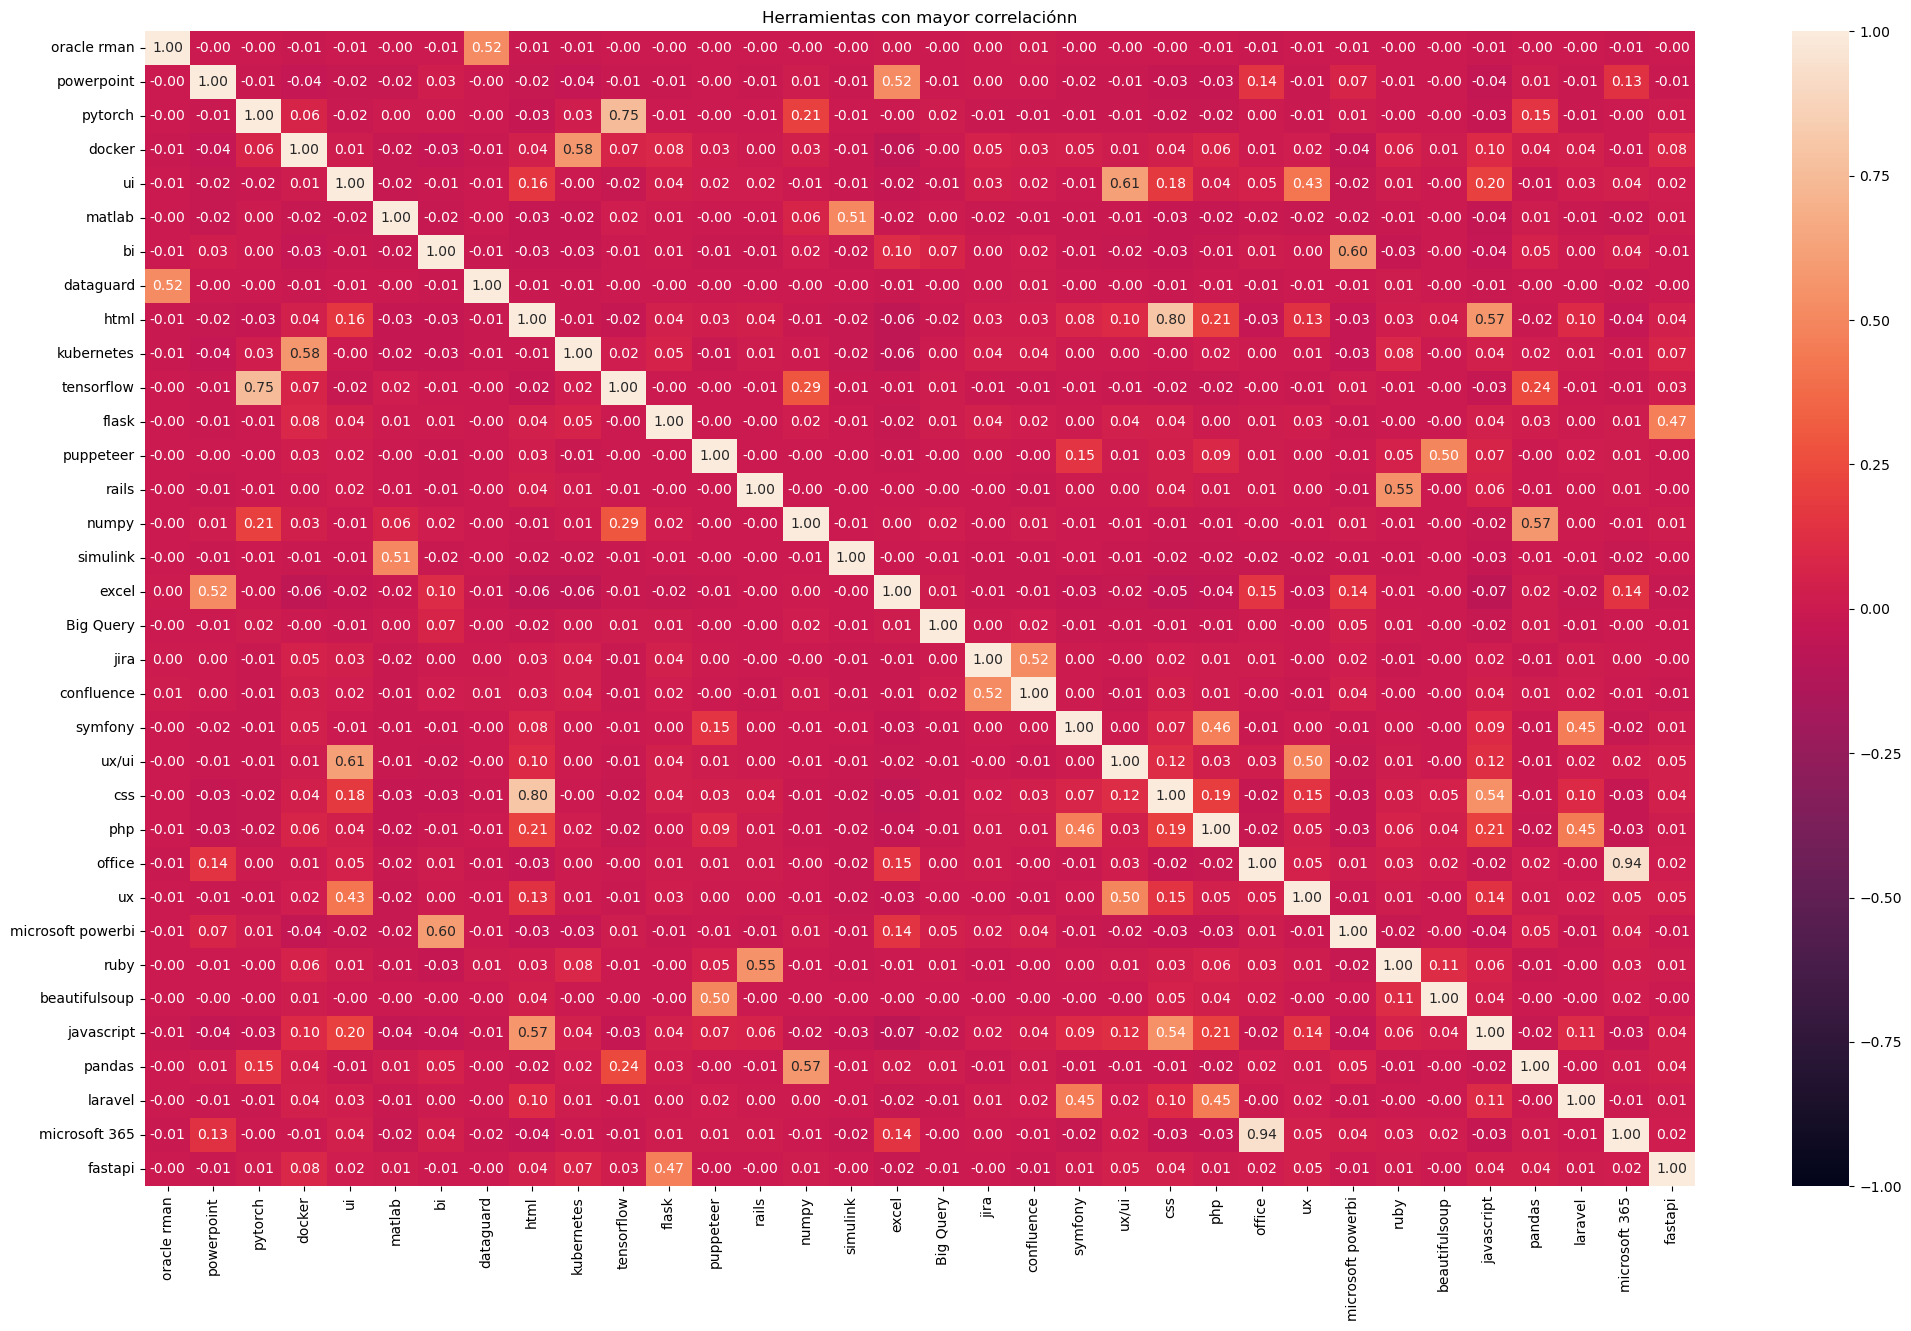

In [309]:
plt.figure(figsize = (25,15))
sns.heatmap(df_herramientas[herraminetas_mayor_correlacion].corr(), vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title(f'Herramientas con mayor correlaciónn')
plt.show()

In [310]:
corr_pairs = matriz_correlacion.abs().unstack().sort_values(ascending=False).drop_duplicates()

#Elefimos solo los pares con herramientas diferentes
max_corr_50_pairs = []
for indice in corr_pairs.index:
    if indice[0] != indice[1]:
        max_corr_50_pairs.append(indice)
        if len(max_corr_50_pairs) == 50:
            break   
max_corr_50_pairs = corr_pairs[max_corr_50_pairs]

In [311]:
# obtenermos los indices para graficas

max_corr_50_pairs = max_corr_50_pairs.reset_index()

max_corr_50_pairs['indice'] = max_corr_50_pairs['level_0'] + ' + ' + max_corr_50_pairs['level_1']

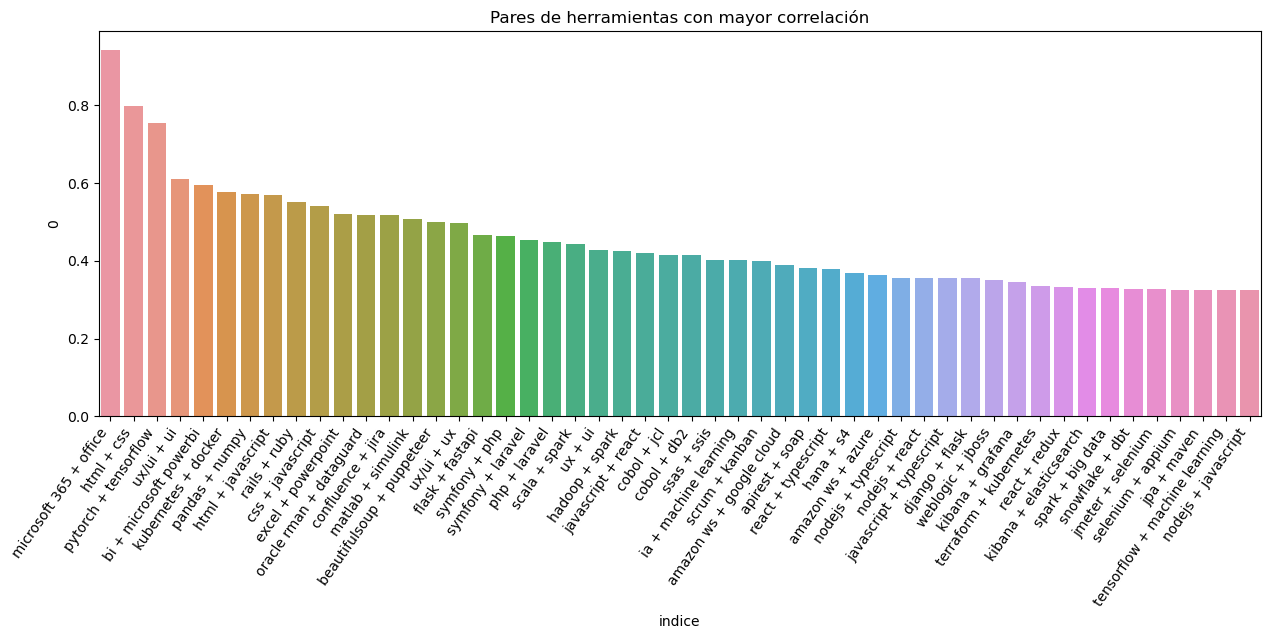

In [312]:
plt.figure(figsize = (15,5))
sns.barplot(x=max_corr_50_pairs['indice'], y=max_corr_50_pairs[0])
plt.xticks(rotation = 55, ha = 'right')
plt.title(f'Pares de herramientas con mayor correlación')
plt.show()

#### Análisis por grupos de  herramientas

In [313]:
def combinaciones_herramientas(df, columnas, n):
    combinaciones_posibles = list(combinations(df[columnas], n))

    # Contar las combinaciones que más se repiten con valor 1
    contador_combinaciones = Counter()

    for combinacion in combinaciones_posibles:
        # Filtrar filas donde todas las columnas en la combinación tienen valor 1
        filas_con_uno = df[df[list(combinacion)].eq(1).all(axis=1)]

        # Contar la frecuencia de la combinación
        contador_combinaciones[combinacion] += len(filas_con_uno)

    # Obtener las combinaciones más comunes
    combinaciones_mas_comunes = contador_combinaciones.most_common()
    
    df = pd.DataFrame(combinaciones_mas_comunes, columns = ['combinacion', 'total'])
    
    return df

In [314]:
top_50_herramientas = df_herramientas[columnas_herramientas].sum().sort_values(ascending = False).head(50).index

top_combinaciones_3 = combinaciones_herramientas(df_herramientas, top_50_herramientas, 3)

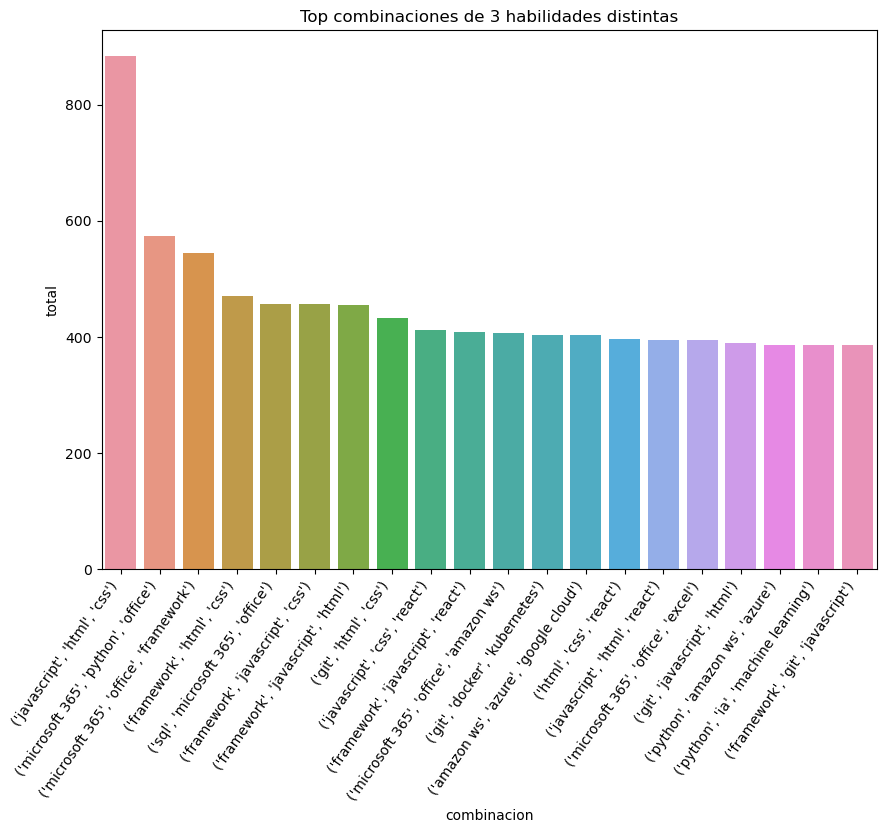

In [315]:
plt.figure(figsize = (10,7))
sns.barplot(top_combinaciones_3[:20], x = 'combinacion', y = 'total')
plt.xticks(rotation = 55, ha = 'right')
plt.title('Top combinaciones de 3 habilidades distintas')
plt.show()

### Análisis bivariable

#### Categoría de empleo

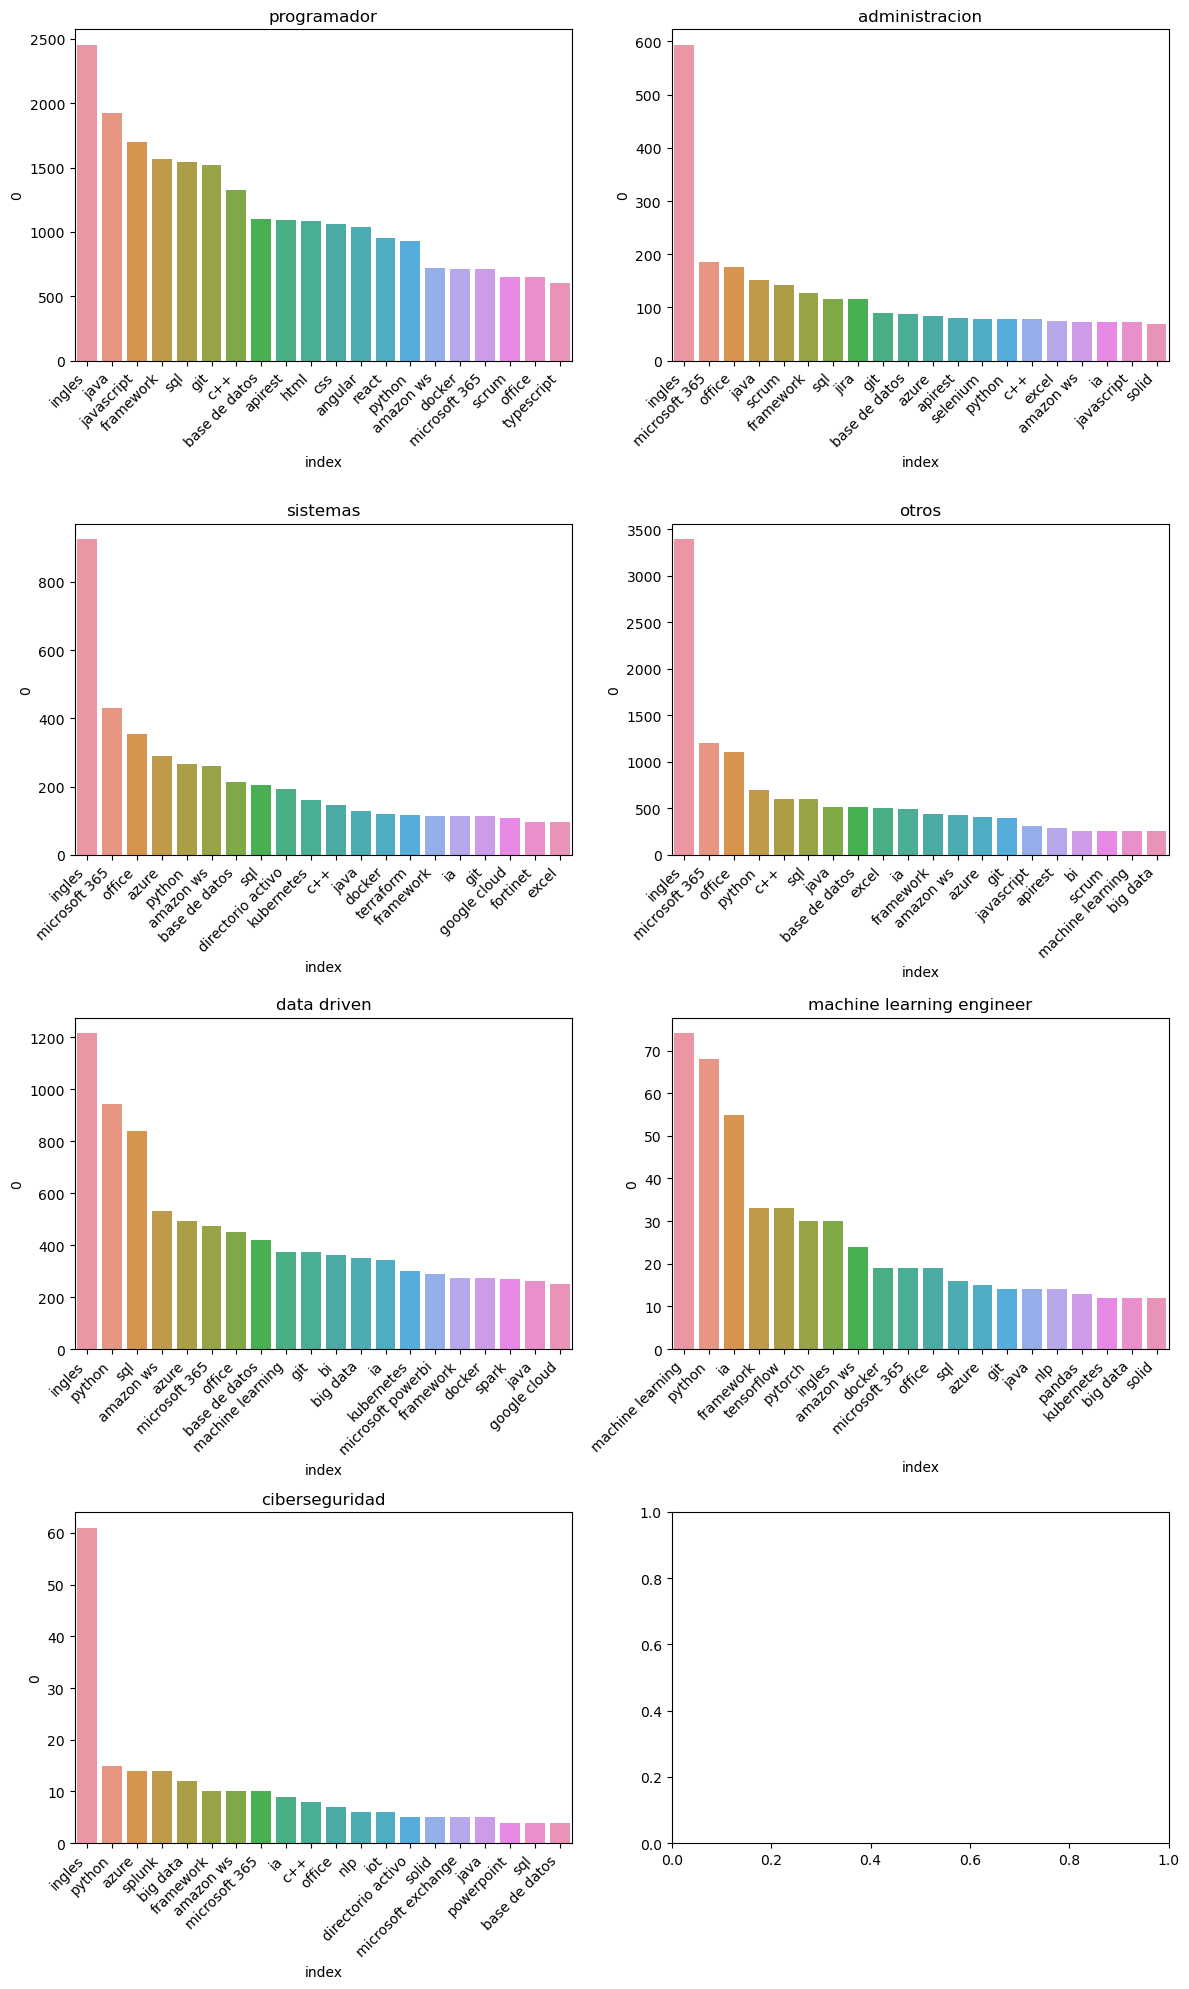

In [24]:
fig, axes = plt.subplots(4,2, figsize = (12, 20))
axes = axes.flatten()

df_categorias = df_herramientas.groupby('categoria_empleo')

for ax, categoria in zip(axes, categorias_empleo):
    df_grafico = df_categorias.get_group(categoria)
    valores = df_grafico[columnas_herramientas].sum().sort_values(ascending = False).head(20).reset_index()
    sns.barplot(x = valores['index'], y = valores[0], ax = ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(categoria)

plt.tight_layout()
plt.show()

## Herramientas sin inglés

In [25]:
df_herramientas = df_herramientas.drop(columns = 'ingles')

columnas_herramientas = df_herramientas.columns.drop(df.columns.drop('herramientas'))

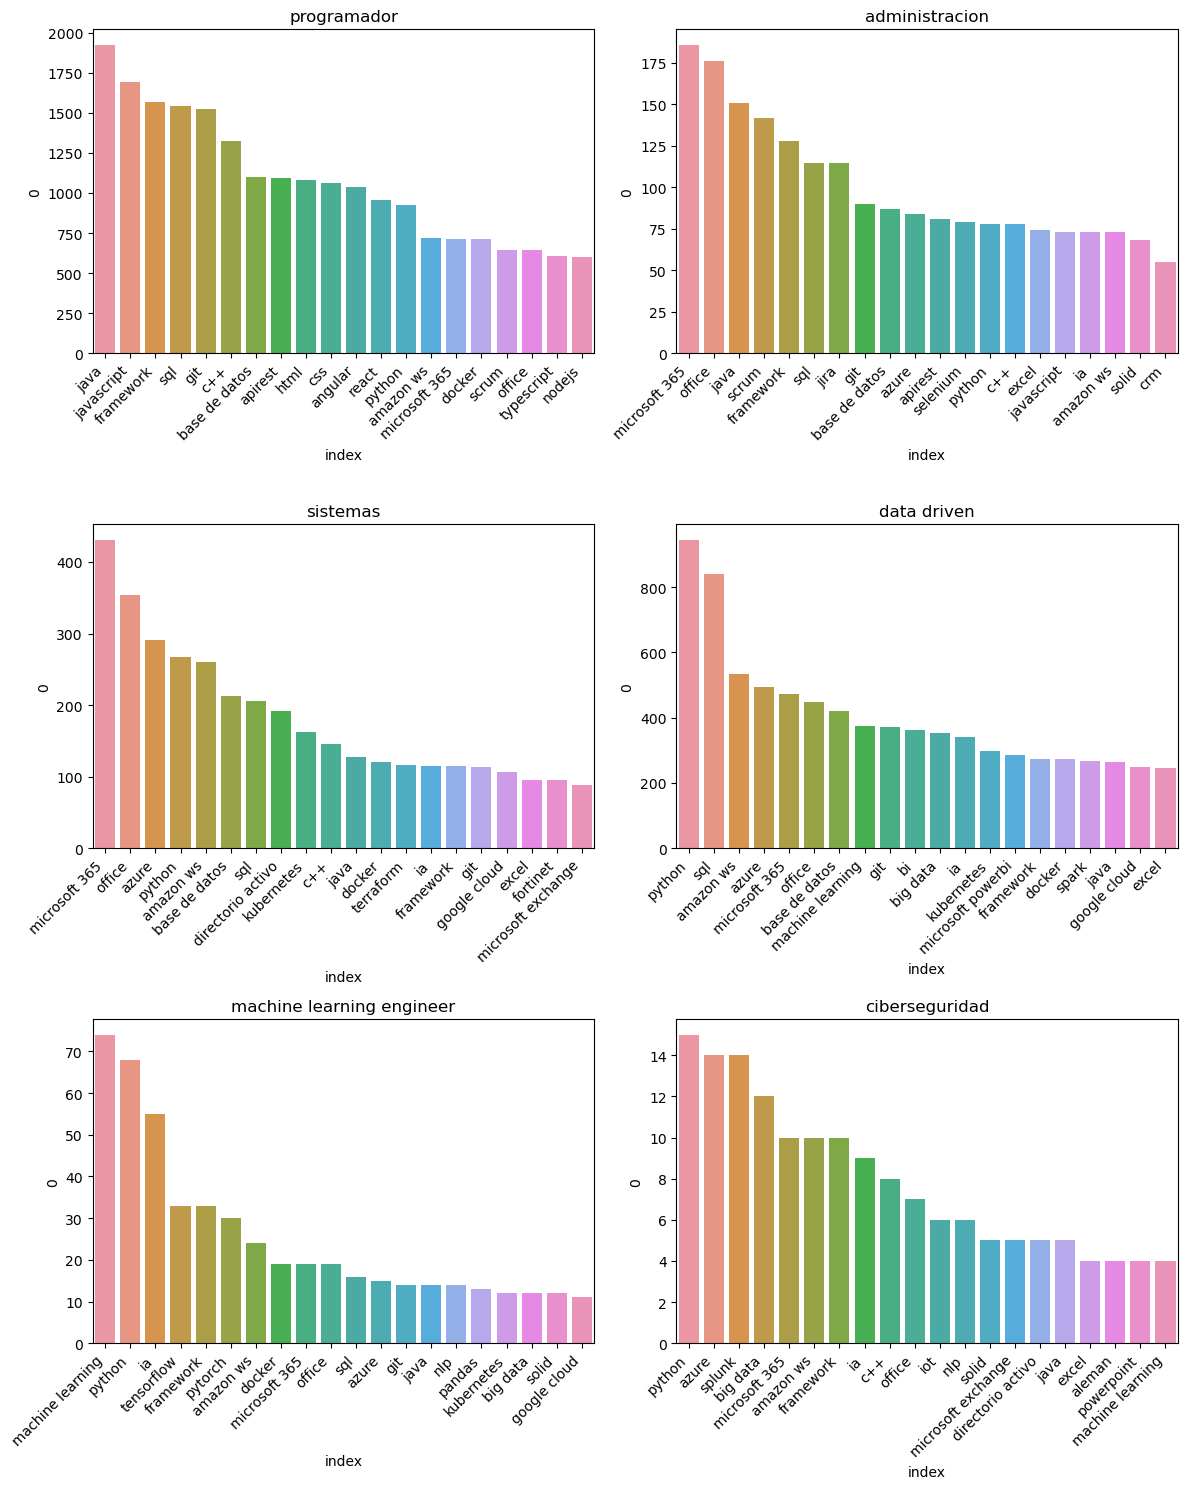

In [26]:
#Sin ingles ni la categoria otros

fig, axes = plt.subplots(3,2, figsize = (12, 15))
axes = axes.flatten()

categorias_sin_otros =df_herramientas[df_herramientas['categoria_empleo']!='otros']['categoria_empleo'].unique()
df_categorias = df_herramientas.groupby('categoria_empleo')

for ax, categoria in zip(axes, categorias_sin_otros):
    df_grafico = df_categorias.get_group(categoria)
    valores = df_grafico[columnas_herramientas].sum().sort_values(ascending = False).head(20).reset_index()
    sns.barplot(x = valores['index'], y = valores[0], ax = ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(categoria)

plt.tight_layout()
plt.show()

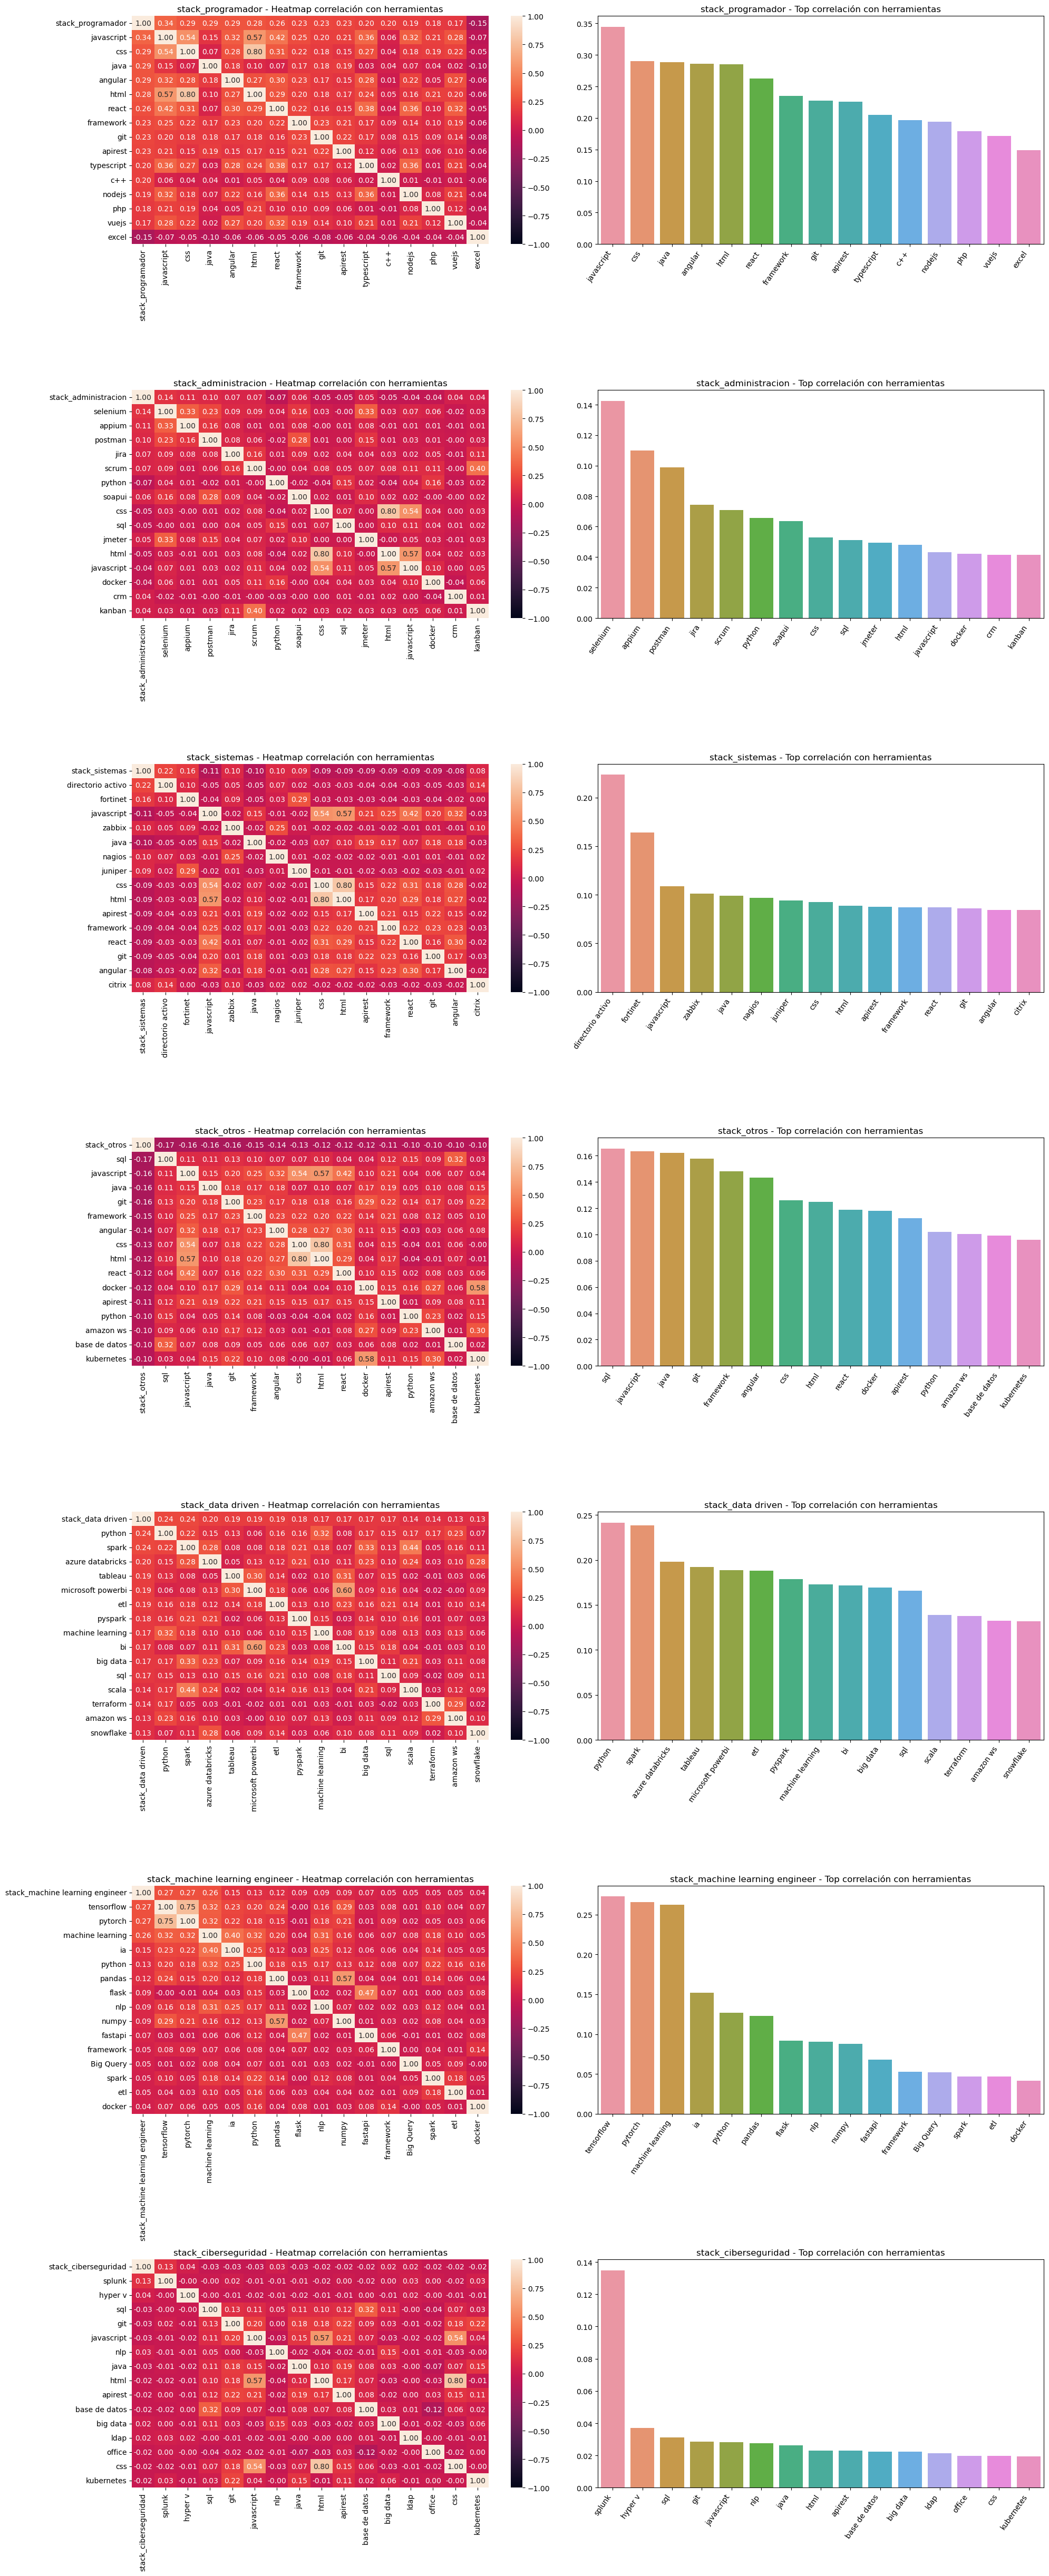

In [201]:
fig, axes = plt.subplots(len(columnas_categorias_empleo), 2, figsize=(20, 7 * len(columnas_categorias_empleo)))

for i, categoria in enumerate(columnas_categorias_empleo):
    matriz_correlacion = df_herramientas[columnas_herramientas.tolist() + [categoria]].corr()
    top_15_herramientas_mayor_correlacion = abs(matriz_correlacion[categoria]).sort_values(ascending=False).head(16)
    
    # Plot del heatmap
    sns.heatmap(df_herramientas[top_15_herramientas_mayor_correlacion.index].corr(), vmin=-1, vmax=1, annot=True, ax=axes[i, 0], fmt = ".2f")
    axes[i, 0].set_title(f'{categoria} - Heatmap correlación con herramientas')
    
    # Plot del barplot
    top_15_herramientas_mayor_correlacion = top_15_herramientas_mayor_correlacion.drop(categoria)
    sns.barplot(x=top_15_herramientas_mayor_correlacion.index, y=top_15_herramientas_mayor_correlacion.values, ax=axes[i, 1])
    axes[i, 1].set_xticklabels(axes[i, 1].get_xticklabels(), rotation=55, ha='right')
    axes[i, 1].set_title(f'{categoria} - Top correlación con herramientas')
    
# Ajustes adicionales según sea necesario
plt.tight_layout()
plt.show()

## Falta hacer analisis bivariable con salarios, comunidades...

## Análisis multivariable herramientas

## Falta hacer el analisis de herramientas comparando con varias columnas (herramientas+salarios+categoria_empleo, ...)

In [30]:
categorias_empleo_sin_otros = categorias_empleo.tolist()

categorias_empleo_sin_otros.remove('otros')

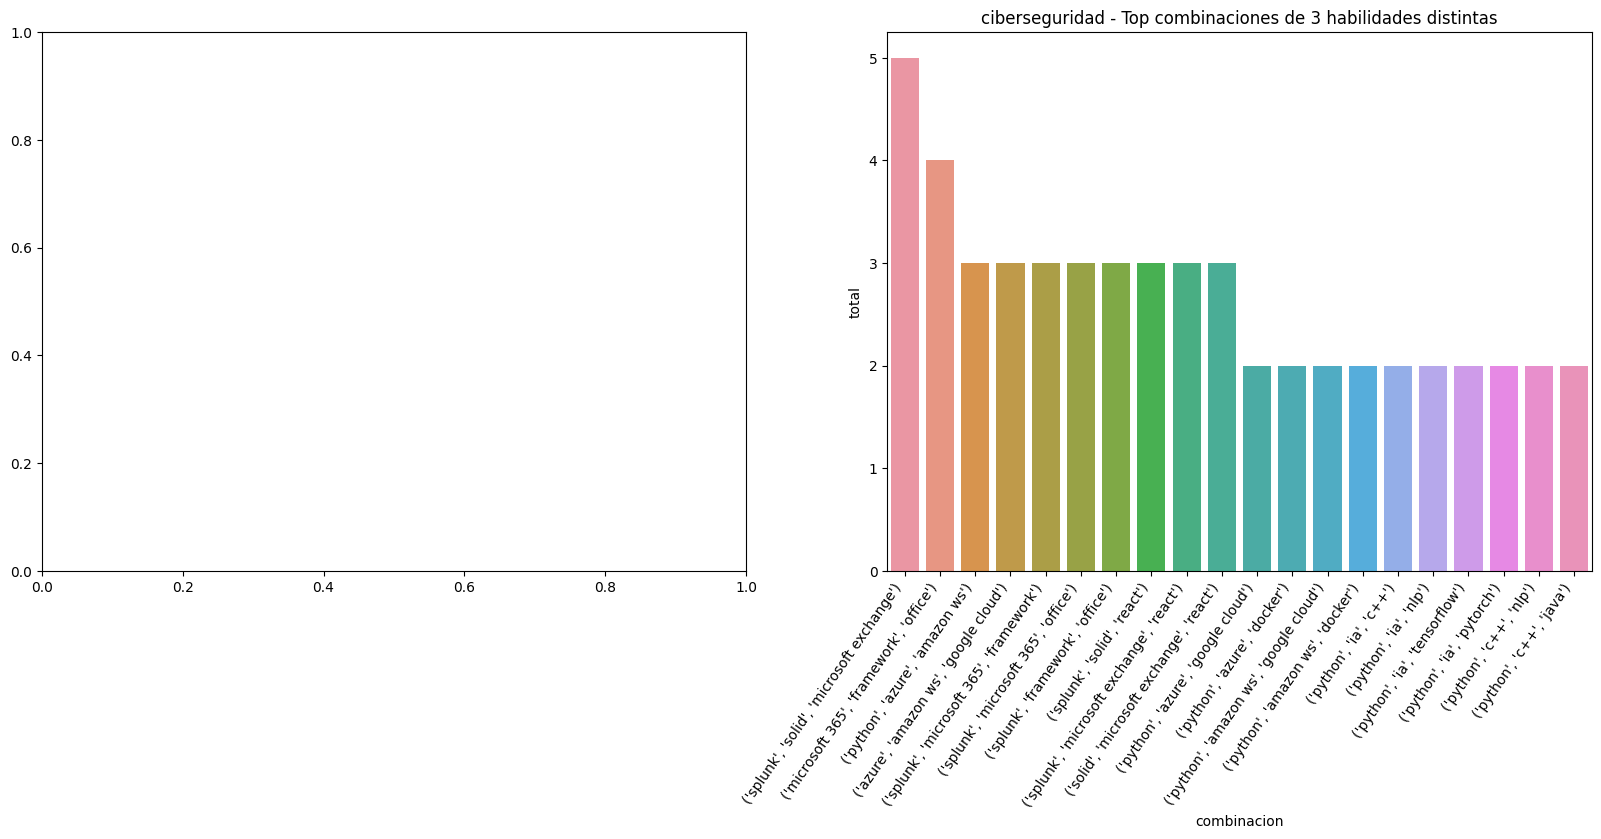

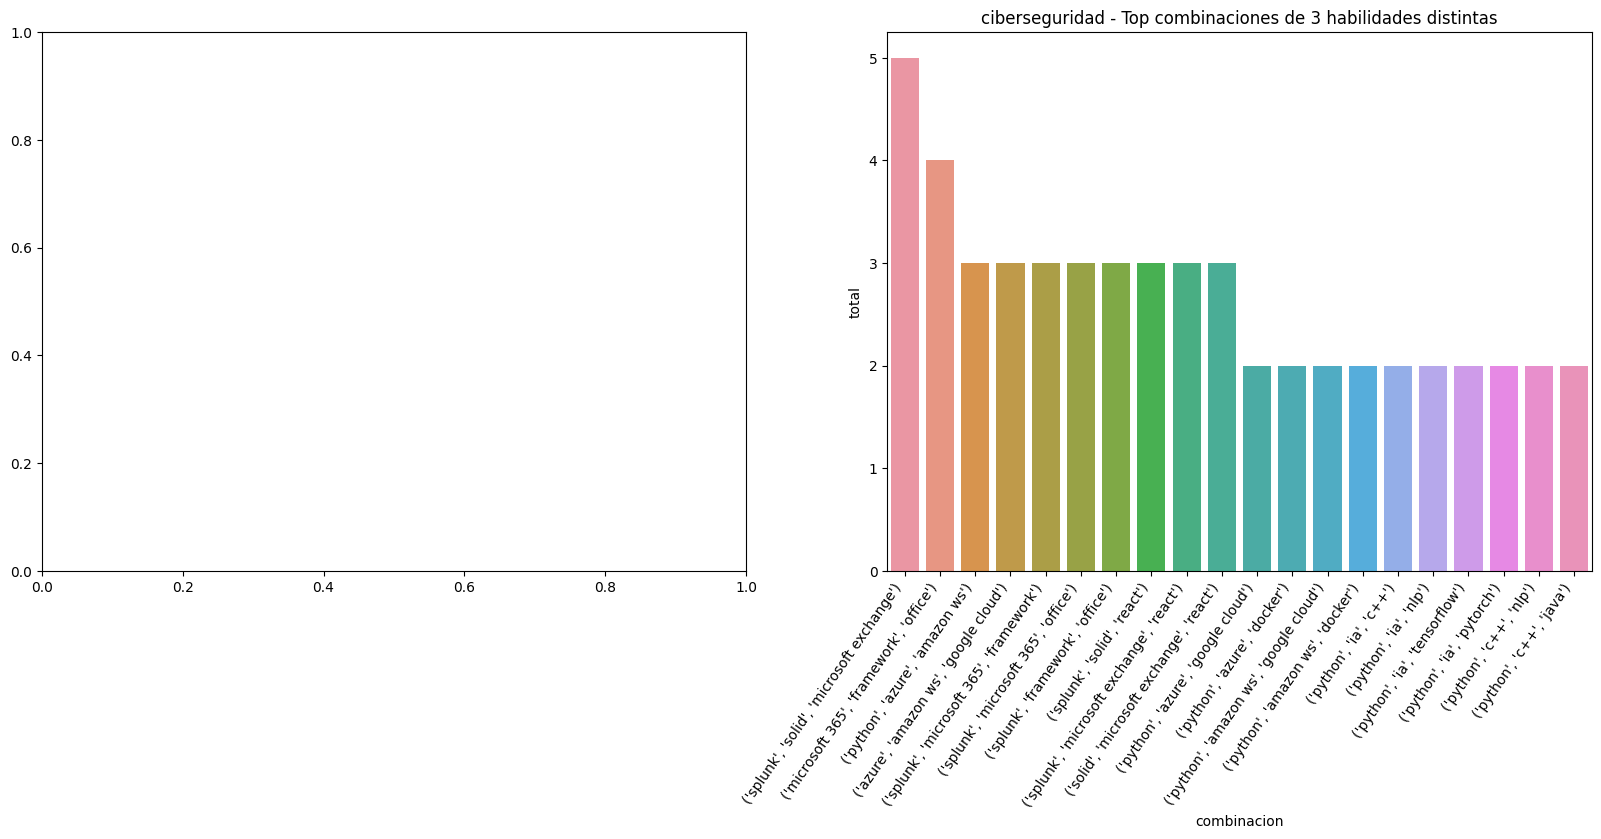

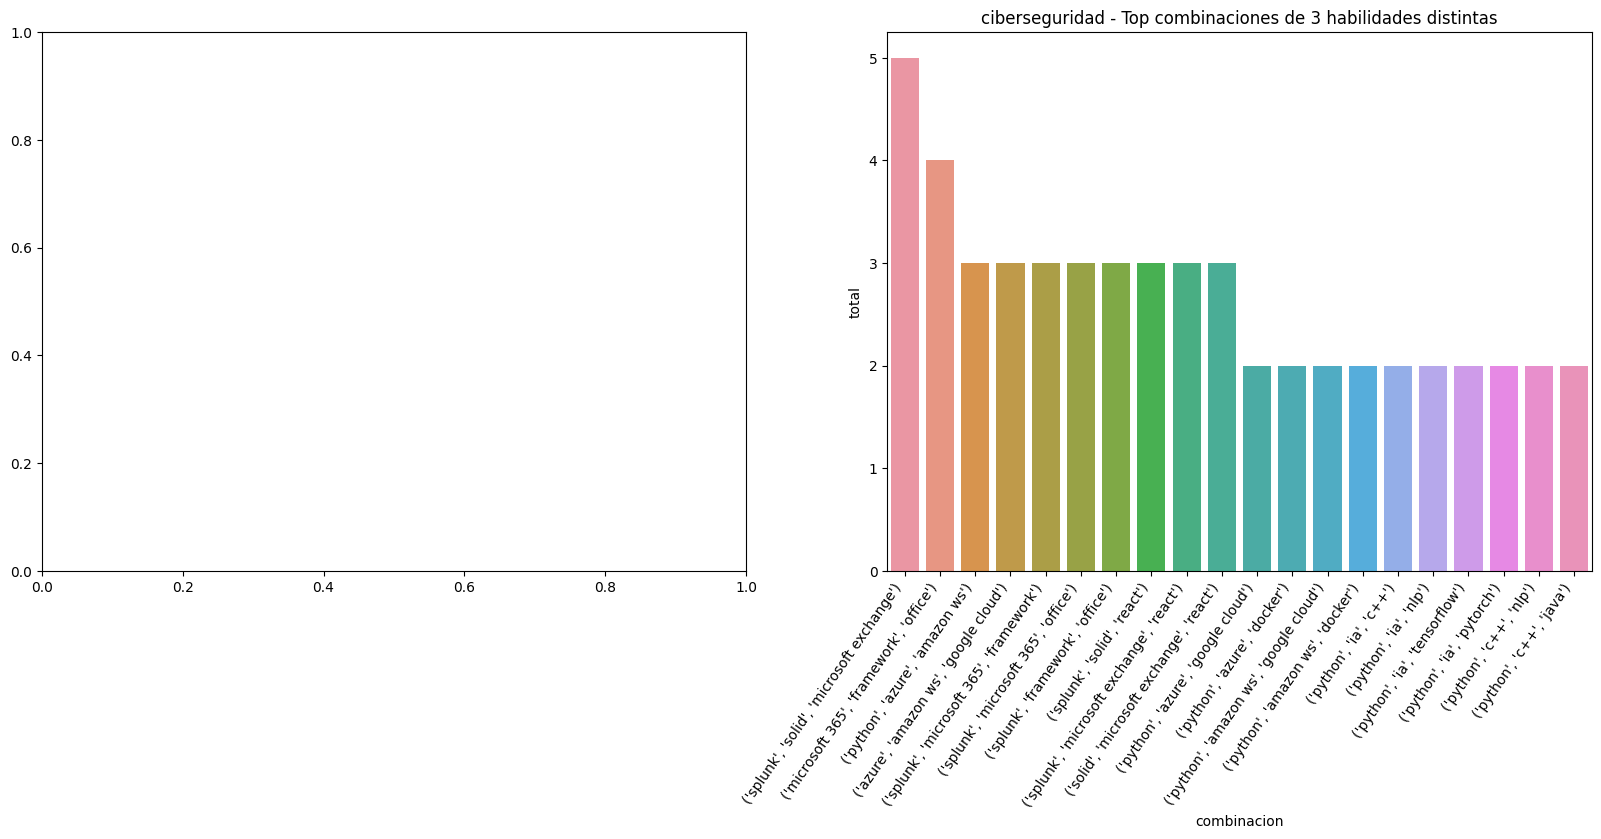

In [97]:
df_categoria = df_herramientas.groupby('categoria_empleo')
combinaciones_3_herramientas = {}

for categorias in zip(categorias_empleo_sin_otros[::2], categorias_empleo_sin_otros[1::2]):
    fig, axes = plt.subplots(1,2,figsize = (20,7))
    axes = axes.flatten()
    
    for ax in zip(axes, categorias):
        df_grafico = df_categoria.get_group(categoria)

        top_50_herramientas = df_grafico[columnas_herramientas].sum().sort_values(ascending = False).head(50).index

        top_combinaciones_3 = combinaciones_herramientas(df_grafico, top_50_herramientas, 3)
        
        combinaciones_3_herramientas[categoria] = top_combinaciones_3
        
        ax = sns.barplot(top_combinaciones_3[:20], x = 'combinacion', y = 'total')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=55, ha='right')
        ax.set_title(f'{categoria} - Top combinaciones de 3 habilidades distintas')

    plt.show()

In [ ]:
#hacer correlacion herramientas con stack tecnologico
##label encoder
##mapa de correlacion

In [34]:
#hacemos OneHotEncoding con las categorias de empleo
df_herramientas = pd.get_dummies(df_herramientas, columns=['categoria_empleo'], prefix = 'stack', prefix_sep = '_', dtype = int)

columnas_categorias_empleo = ['stack_' + empleo for empleo in categorias_empleo]

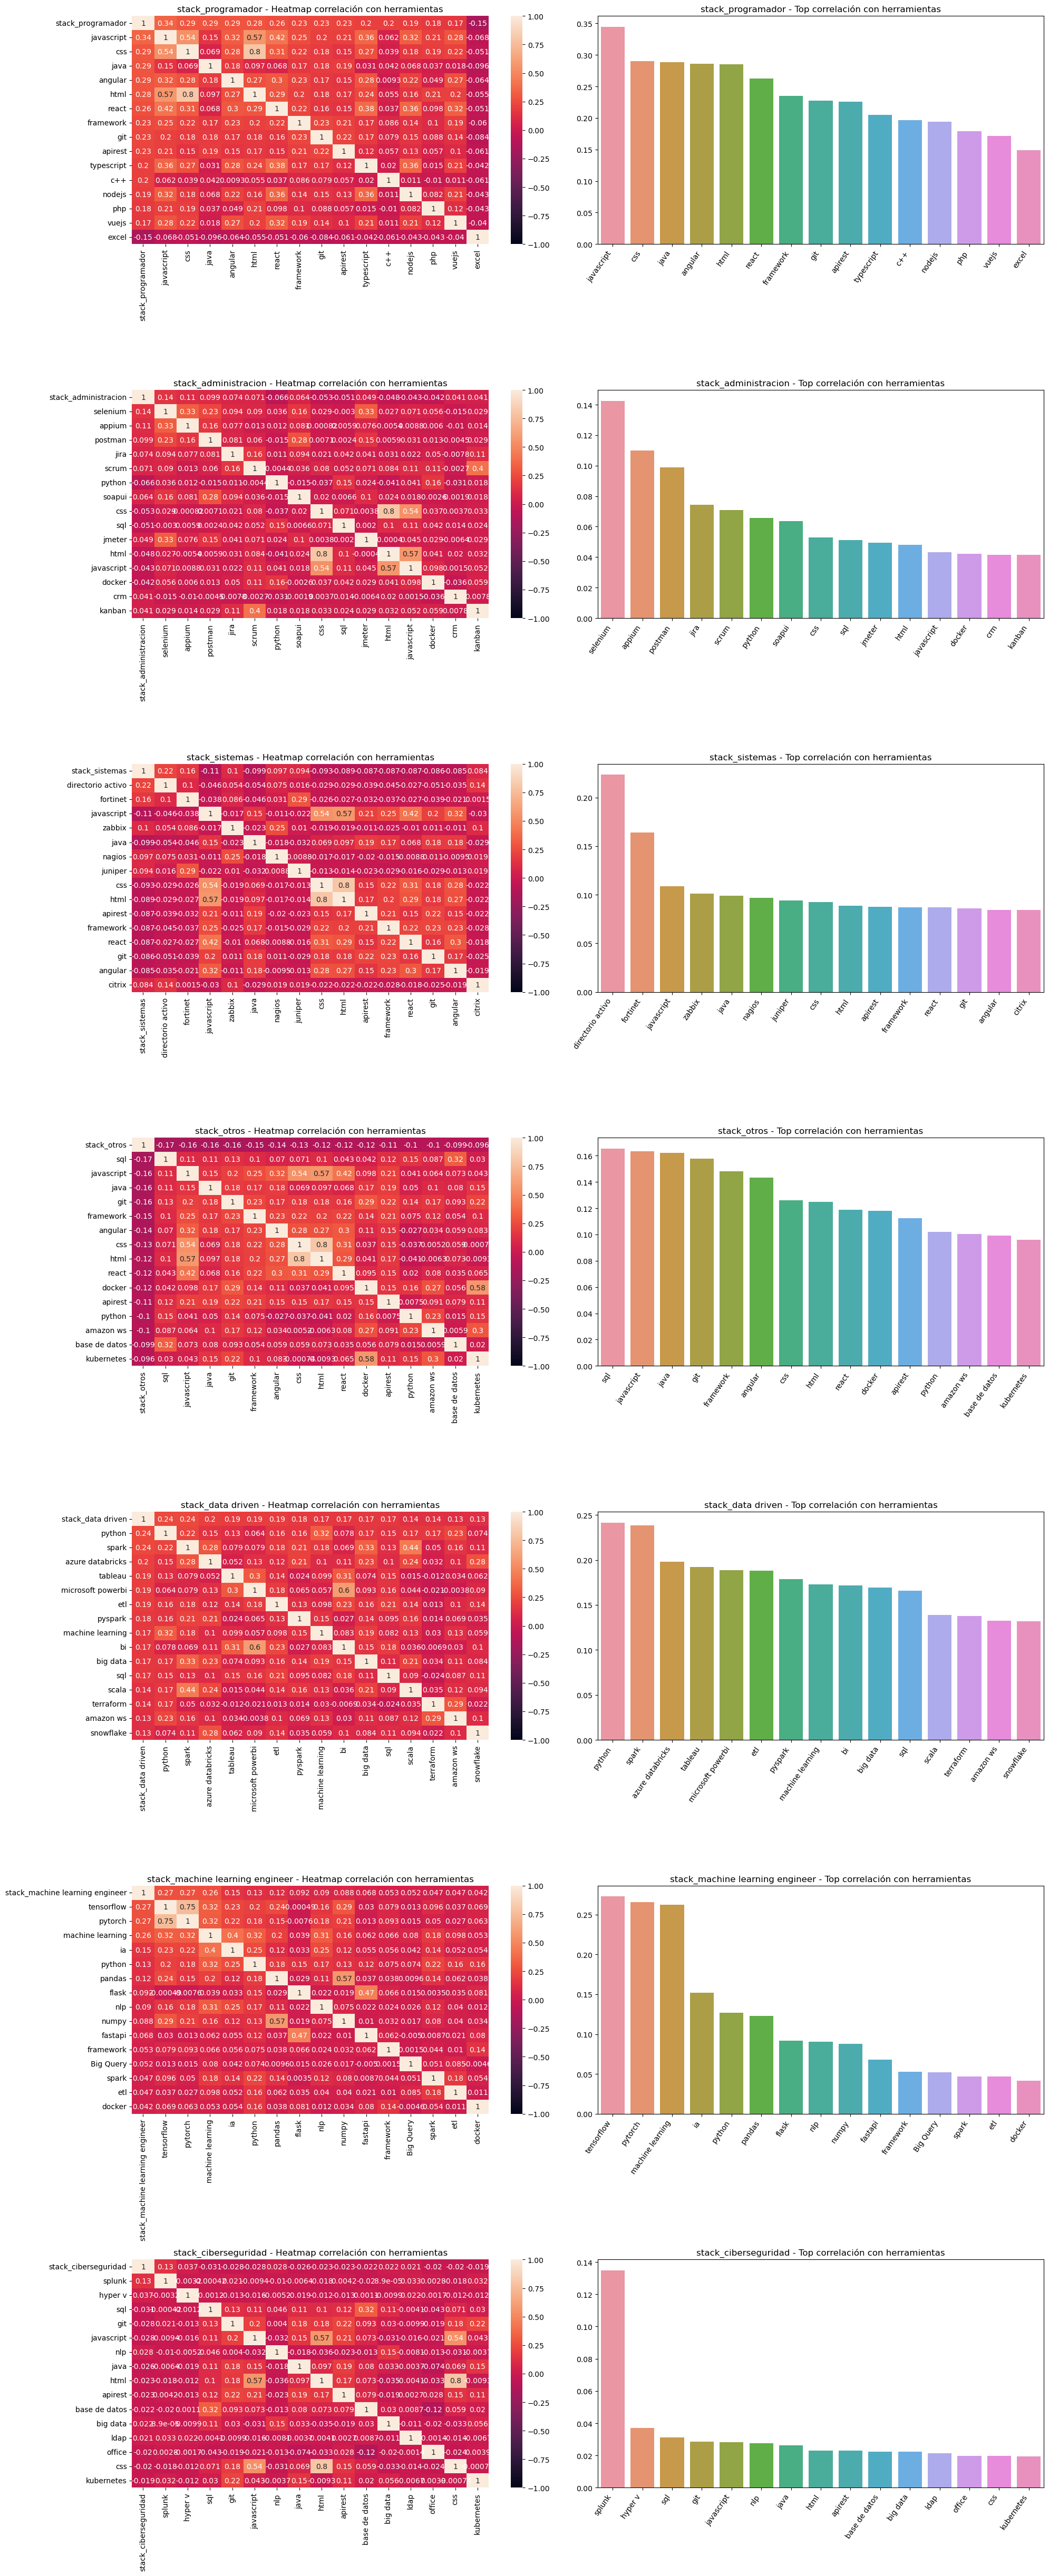

In [119]:
# Asegúrate de que len(columnas_categorias_empleo) sea la cantidad deseada de filas
fig, axes = plt.subplots(len(columnas_categorias_empleo), 2, figsize=(20, 7 * len(columnas_categorias_empleo)))

for i, categoria in enumerate(columnas_categorias_empleo):
    matriz_correlacion = df_herramientas[columnas_herramientas.tolist() + [categoria]].corr()
    top_15_herramientas_mayor_correlacion = abs(matriz_correlacion[categoria]).sort_values(ascending=False).head(16)
    
    # Plot del heatmap
    sns.heatmap(df_herramientas[top_15_herramientas_mayor_correlacion.index].corr(), vmin=-1, vmax=1, annot=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{categoria} - Heatmap correlación con herramientas')
    
    # Plot del barplot
    top_15_herramientas_mayor_correlacion = top_15_herramientas_mayor_correlacion.drop(categoria)
    sns.barplot(x=top_15_herramientas_mayor_correlacion.index, y=top_15_herramientas_mayor_correlacion.values, ax=axes[i, 1])
    axes[i, 1].set_xticklabels(axes[i, 1].get_xticklabels(), rotation=55, ha='right')
    axes[i, 1].set_title(f'{categoria} - Top correlación con herramientas')
    
# Ajustes adicionales según sea necesario
plt.tight_layout()
plt.show()

# Análisis salarios

In [ ]:
df_salarios['salario_medio'] = (df['salario_min'].replace({np.nan : 0}) + df['salario_max'].replace({np.nan : 0})) / 2

In [ ]:
def metodo_tukey(df, columna, alfa):
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    riq = q3 - q1

    df = df[df[columna].between(q1 - alfa * riq, q3 + alfa * riq) | (df[columna].isna())]
    
    return df

In [ ]:
df_salarios = df.dropna(subset = ['salario_min', 'salario_max'], how = 'all')

In [ ]:
df_salarios = df_salarios[df_salarios['salario_min'] > 15000]

In [ ]:
df_salarios.shape

In [ ]:
df_salarios = metodo_tukey(df_salarios, 'salario_min', 1.5)
df_salarios = metodo_tukey(df_salarios, 'salario_max', 1.5)

In [ ]:
df_salarios.shape

In [ ]:
df_salarios['salario_medio']